# Import necessary dependencies

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns

%matplotlib inline

# Exercise 1: Data Preparation

# Load and merge datasets

## TODO
- Read about the dataset structure (winequality.names)
- Load the winequality-white.csv and winequality-red.csv into Pandas DataFrames
- Add `wine_type` as an attribute
- Use `apply` method (and then pd.Categorical) to encode `quality_label` attribute (feature) with categorical values -> `low`, `medium`, `high`
    - Assume: <br/>
        'low' : $quality \in [0, 5)$, <br/>
        'medium' : $quality \in [5, 7)$, <br/>
        'high' : $quality \in [7, 10]$,
- merge red and white wine datasets and assign it to `wines` variable
- re-shuffle records to randomize data points

In [31]:
#Reading
red_wine = pd.read_csv('winequality-red.csv', sep=';')
white_wine = pd.read_csv('winequality-white.csv', sep=';')

#Adding wine_type attribute
red_wine["wine_type"] = "red"
white_wine["wine_type"] = "white"

def map_quality_to_label(quality: int) -> str:
    if 0 <= quality < 5:
        return "low"
    elif 5 <= quality < 7 :
        return "medium"
    elif 7 <= quality < 10 :
        return "high"
    else:
        return "unknown"


#Mapping and Caterogical
red_wine["quality_label"] = red_wine["quality"].apply(lambda x: map_quality_to_label(x))
red_wine["quality_label"] = pd.Categorical(red_wine.quality_label)


white_wine["quality_label"] = white_wine["quality"].apply(lambda x: map_quality_to_label(x))
white_wine["quality_label"] = pd.Categorical(white_wine.quality_label)

#Merging
wines = pd.concat([red_wine, white_wine], axis=0)
#Shuffling
wines = wines.sample(frac=1)

# Understand dataset features and values

In [32]:
# print head of dataset as a help and then read the dataset description below
wines.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
2044            5.7             0.385         0.04            12.6      0.034   
196             6.4             0.290         0.44             3.6      0.197   
276             6.7             0.200         0.41             9.1      0.044   
665             9.4             0.590         0.14             2.0      0.084   
4861            5.5             0.310         0.29             3.0      0.027   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
2044                 22.0                 115.0  0.99640  3.28       0.63   
196                  75.0                 183.0  0.99420  3.01       0.38   
276                  50.0                 166.0  0.99540  3.14       0.58   
665                  25.0                  48.0  0.99810  3.14       0.56   
4861                 16.0                 102.0  0.99067  3.23       0.56   

      alcohol  quality wine_type quality_label  
2044      9.9        6     white        medium  
196       9.1        5     white        medium  
276       9.8        6     white        medium  
665       9.7        5       red        medium  
4861     11.2        6     white        medium

### Understanding Wine and Types

Wine is an alcoholic beverage made from grapes which is fermented without the addition of sugars, acids, enzymes, water, or other nutrients

Red wine is made from dark red and black grapes. The color usually ranges from various shades of red, brown and violet. This is produced with whole grapes including the skin which adds to the color and flavor of red wines, giving it a rich flavor.

White wine is made from white grapes with no skins or seeds. The color is usually straw-yellow, yellow-green, or yellow-gold. Most white wines have a light and fruity flavor as compared to richer red wines.

### Understanding Wine Attributes and Properties 


- **fixed acidity:** Acids are one of the fundamental properties of wine and contribute greatly to the taste of the wine. Reducing acids significantly might lead to wines tasting flat. Fixed acids include tartaric, malic, citric, and succinic acids which are found in grapes (except succinic). This variable is usually expressed in $\frac{g(tartaricacid)}{dm^3}$ in the dataset.


- **volatile acidity:** These acids are to be distilled out from the wine before completing the production process. It is primarily constituted of acetic acid though other acids like lactic, formic and butyric acids might also be present. Excess of volatile acids are undesirable and lead to unpleasant flavor. In the US, the legal limits of volatile acidity are 1.2 g/L for red table wine and 1.1 g/L for white table wine. The volatile acidity is expressed in $\frac{g(aceticacid)}{dm^3}$ in the dataset.


- **citric acid:** This is one of the fixed acids which gives a wine its freshness. Usually most of it is consumed during the fermentation process and sometimes it is added separately to give the wine more freshness. It's usually expressed in $\frac{g}{dm^3}$ in the dataset.


- **residual sugar:** This typically refers to the natural sugar from grapes which remains after the fermentation process stops, or is stopped. It's usually expressed in $\frac{g}{dm^3}$ in the dataset.


- **chlorides:** This is usually a major contributor to saltiness in wine. It's usually expressed in $\frac{g(sodiumchloride)}{dm^3}$ in the dataset.


- **free sulfur dioxide:** This is the part of the sulphur dioxide that when added to a wine is said to be free after the remaining part binds. Winemakers will always try to get the highest proportion of free sulphur to bind. They are also known as sulfites and too much of it is undesirable and gives a pungent odour. This variable is expressed in $\frac{mg}{dm^3}$ in the dataset.


- **total sulfur dioxide:** This is the sum total of the bound and the free sulfur dioxide ($SO_2$). Here, it's expressed in $\frac{mg}{dm^3}$. This is mainly added to kill harmful bacteria and preserve quality and freshness. There are usually legal limits for sulfur levels in wines and excess of it can even kill good yeast and give out undesirable odour.


- **density:** This can be represented as a comparison of the weight of a specific volume of wine to an equivalent volume of water. It is generally used as a measure of the conversion of sugar to alcohol. Here, it's expressed in $\frac{g}{cm^3}$.


- **pH:** Also known as the potential of hydrogen, this is a numeric scale to specify the acidity or basicity the wine. Fixed acidity contributes the most towards the pH of wines. You might know, solutions with a pH less than 7 are acidic, while solutions with a pH greater than 7 are basic. With a pH of 7, pure water is neutral. Most wines have a pH between 2.9 and 3.9 and are therefore acidic.


- **sulphates:** These are mineral salts containing sulfur. Sulphates are to wine as gluten is to food. They are a regular part of the winemaking around the world and are considered essential. They are connected to the fermentation process and affects the wine aroma and flavor. Here, it's expressed in $\frac{g(potassiumsulphate)}{dm^3}$ in the dataset.


- **alcohol:** Wine is an alcoholic beverage. Alcohol is formed as a result of yeast converting sugar during the fermentation process. The percentage of alcohol can vary from wine to wine. Hence it is not a surprise for this attribute to be a part of this dataset. It's usually measured in % vol or alcohol by volume (ABV).


- **quality:** Wine experts graded the wine quality between 0 (very bad) and 10 (very excellent). The eventual quality score is the median of at least three evaluations made by the same wine experts.


- **wine_type:** Since we originally had two datasets for red and white wine, we introduced this attribute in the final merged dataset which indicates the type of wine for each data point. A wine can either be a 'red' or a 'white' wine. One of the predictive models we will build in this chapter would be such that we can predict the type of wine by looking at other wine attributes.


- **quality_label:** This is a derived attribute from the `quality` attribute. We bucket or group wine quality scores into three qualitative buckets namely low, medium and high. Wines with a quality score of 3, 4 & 5 are low quality, scores of 6 & 7 are medium quality and scores of 8 & 9 are high quality wines. We will also build another model in this chapter to predict this wine quality label based on other wine attributes. 

# Exploratory Data Analysis and Visualizations

## Descriptive Statistics

Let’s do a quick basic descriptive summary statistics on some of these attributes of interest.

In [15]:
subset_attributes = ['residual sugar', 'total sulfur dioxide', 'sulphates', 'alcohol', 'volatile acidity', 'quality']
rs = round(red_wine[subset_attributes].describe(),2)
ws = round(white_wine[subset_attributes].describe(),2)
pd.concat([rs, ws], axis=1, keys=['Red Wine Statistics', 'White Wine Statistics'])

Red Wine Statistics                                          \
           residual sugar total sulfur dioxide sulphates  alcohol   
count             1599.00              1599.00   1599.00  1599.00   
mean                 2.54                46.47      0.66    10.42   
std                  1.41                32.90      0.17     1.07   
min                  0.90                 6.00      0.33     8.40   
25%                  1.90                22.00      0.55     9.50   
50%                  2.20                38.00      0.62    10.20   
75%                  2.60                62.00      0.73    11.10   
max                 15.50               289.00      2.00    14.90   

                                White Wine Statistics                       \
      volatile acidity  quality        residual sugar total sulfur dioxide   
count          1599.00  1599.00               4898.00              4898.00   
mean              0.53     5.64                  6.39               138.36   
std               0.18     0.81                  5.07                42.50   
min               0.12     3.00                  0.60                 9.00   
25%               0.39     5.00                  1.70               108.00   
50%               0.52     6.00                  5.20               134.00   
75%               0.64     6.00                  9.90               167.00   
max               1.58     8.00                 65.80               440.00   

                                                    
      sulphates  alcohol volatile acidity  quality  
count   4898.00  4898.00          4898.00  4898.00  
mean       0.49    10.51             0.28     5.88  
std        0.11     1.23             0.10     0.89  
min        0.22     8.00             0.08     3.00  
25%        0.41     9.50             0.21     5.00  
50%        0.47    10.40             0.26     6.00  
75%        0.55    11.40             0.32     6.00  
max        1.08    14.20             1.10     9.00

In [16]:
subset_attributes = ['alcohol', 'volatile acidity', 'pH', 'quality']
ls = round(wines[wines['quality_label'] == 'low'][subset_attributes].describe(),2)
ms = round(wines[wines['quality_label'] == 'medium'][subset_attributes].describe(),2)
hs = round(wines[wines['quality_label'] == 'high'][subset_attributes].describe(),2)
pd.concat([ls, ms, hs], axis=1, keys=['Low Quality Wine', 'Medium Quality Wine', 'High Quality Wine'])

Low Quality Wine                                  Medium Quality Wine  \
               alcohol volatile acidity      pH quality             alcohol   
count           246.00           246.00  246.00  246.00             4974.00   
mean             10.18             0.47    3.23    3.88               10.27   
std               1.00             0.25    0.19    0.33                1.07   
min               8.00             0.11    2.74    3.00                8.00   
25%               9.40             0.28    3.09    4.00                9.40   
50%              10.05             0.38    3.22    4.00               10.00   
75%              10.90             0.61    3.36    4.00               11.00   
max              13.50             1.58    3.90    4.00               14.90   

                                         High Quality Wine                   \
      volatile acidity       pH  quality           alcohol volatile acidity   
count          4974.00  4974.00  4974.00           1277.00          1277.00   
mean              0.35     3.22     5.57             11.43             0.29   
std               0.17     0.16     0.50              1.22             0.12   
min               0.08     2.72     5.00              8.50             0.08   
25%               0.23     3.11     5.00             10.70             0.20   
50%               0.30     3.20     6.00             11.50             0.27   
75%               0.42     3.32     6.00             12.40             0.34   
max               1.33     4.01     6.00             14.20             0.92   

                         
            pH  quality  
count  1277.00  1277.00  
mean      3.23     7.16  
std       0.16     0.38  
min       2.84     7.00  
25%       3.12     7.00  
50%       3.22     7.00  
75%       3.34     7.00  
max       3.82     9.00

# Exercise 2: Univariate Analysis

# Univariate Analysis
Univariate analysis is basically the simplest form of data analysis or visualization where we are only concerned with analyzing one data attribute or variable and visualizing the same (one dimension).

## Visualizing one dimension

## TODO

One of the quickest and most effective ways to visualize all numeric data and their distributions, is to leverage histograms using pandas. Plot histograms, which will give you a good idea about the basic data distribution of any of the attributes.



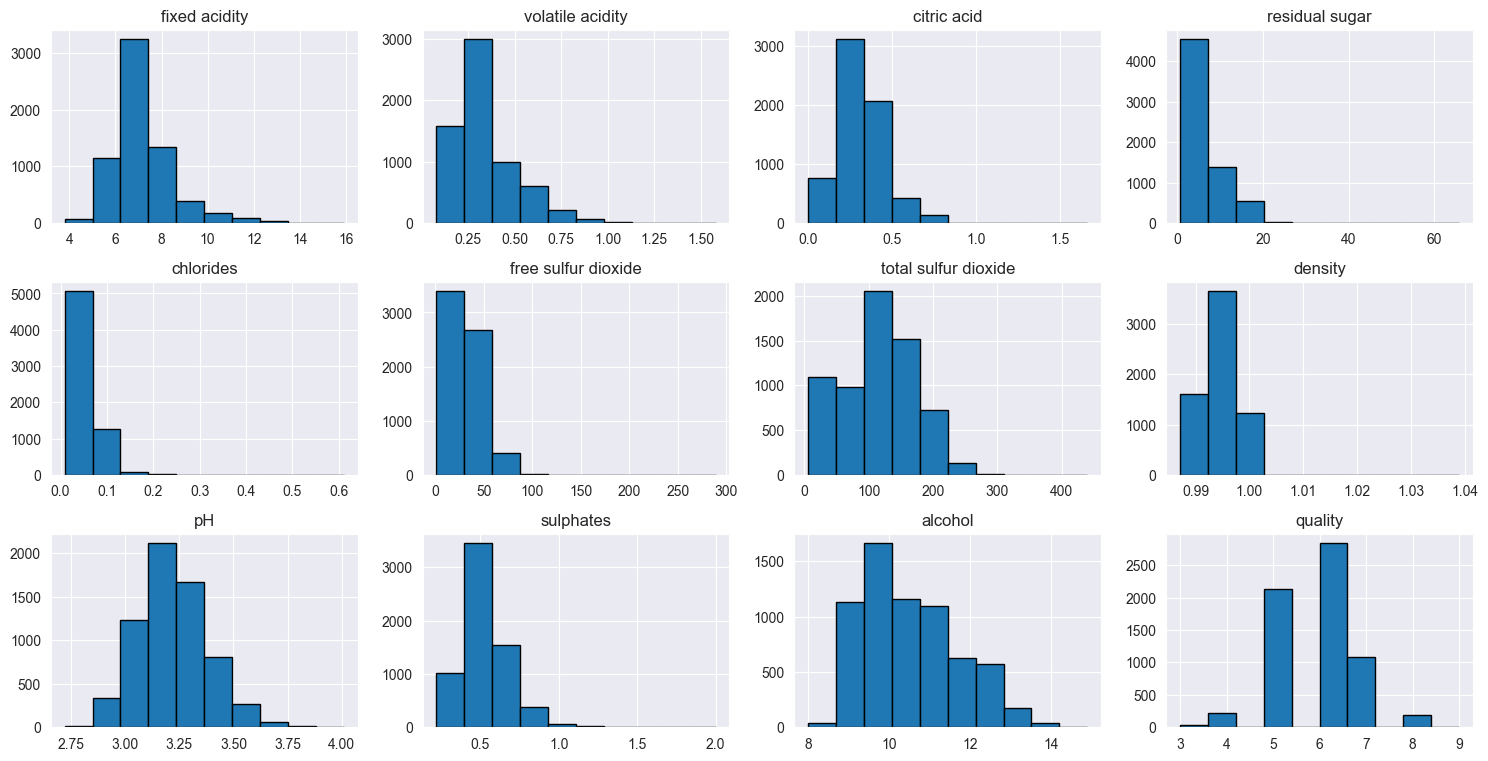

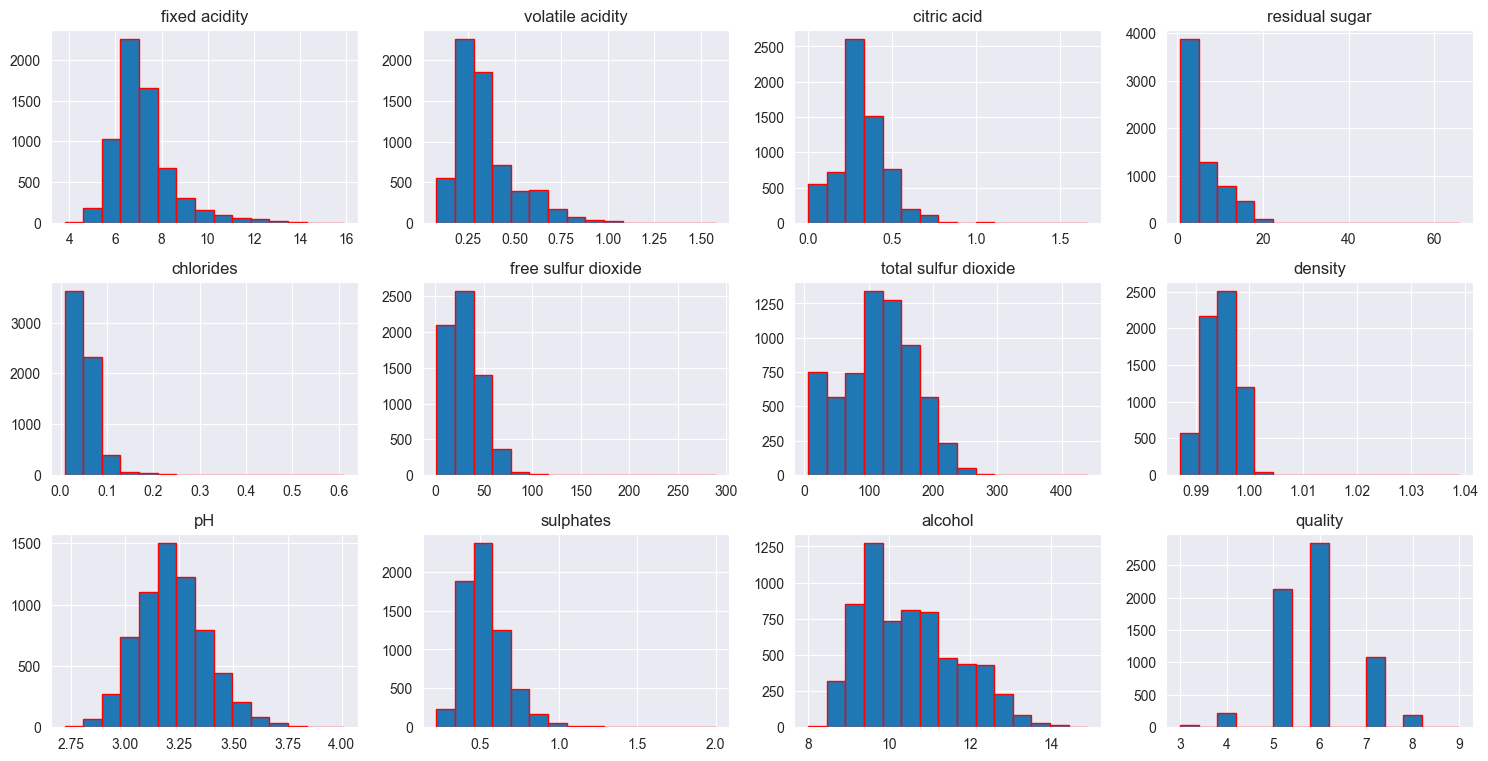

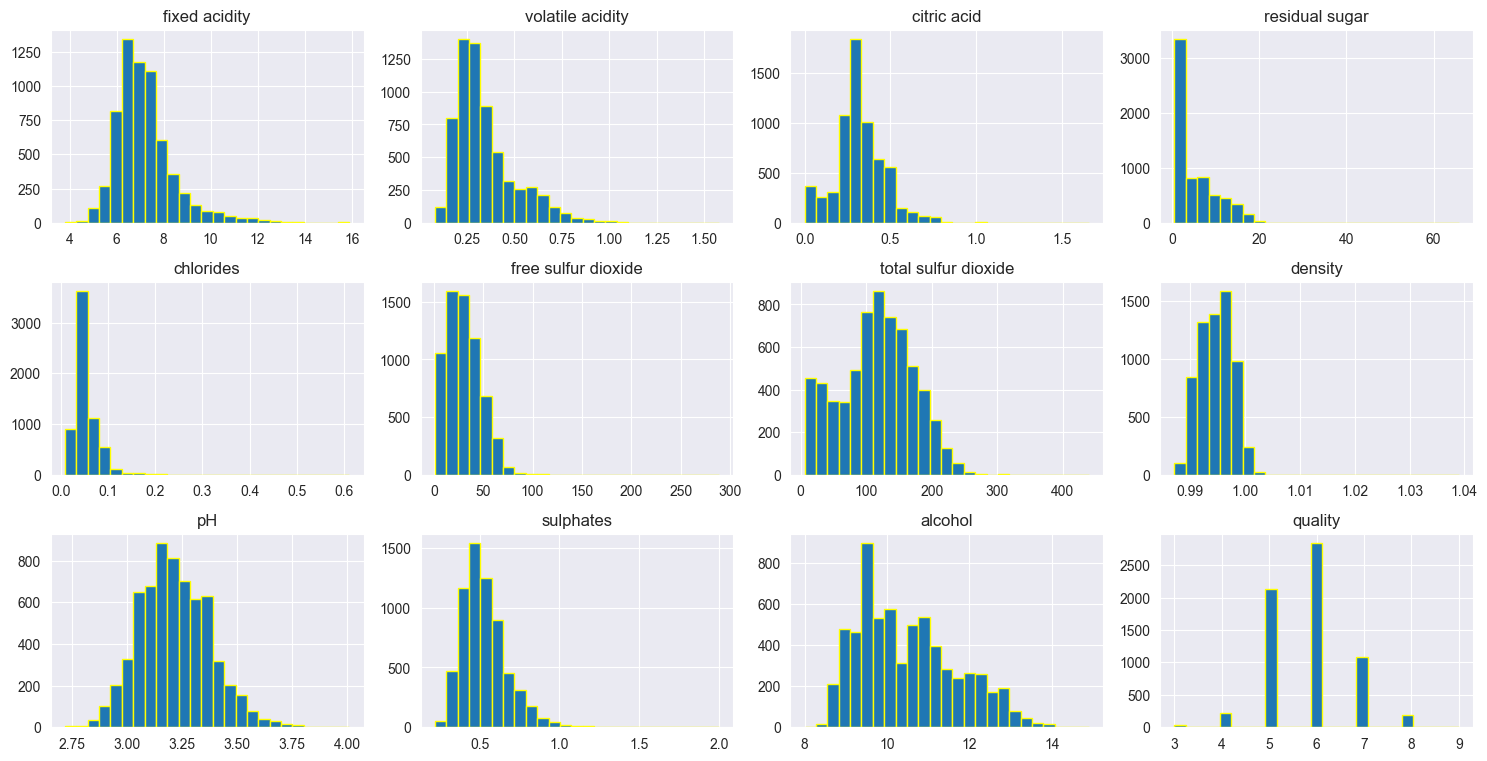

In [19]:
# Plotting histograms for all numeric columns in the dataset
wines.hist(bins=10, figsize=(15, 10), layout=(4, 4), edgecolor='black')
plt.tight_layout()
plt.show()

# Plotting histograms for all numeric columns in the dataset
wines.hist(bins=15, figsize=(15, 10), layout=(4, 4), edgecolor='red')
plt.tight_layout()
plt.show()

# Plotting histograms for all numeric columns in the dataset
wines.hist(bins=25, figsize=(15, 10), layout=(4, 4), edgecolor='yellow')
plt.tight_layout()
plt.show()

##### Analysis Questions:
1. Most of the distribution has shape similar to normal distribution and a couple of them looks like have positive skewness. Quality distribution is discrete, rest is continuous.
2. Seems that, fixed acidity distribution have some outlier with value around 16.
3. Mode in all distribution, is a value in X axis for which we have the biggest value on Y axis. For normal distribution mean=mode=median. In our example, when we have examples with positive skewness then mode < median < mean. This is popular example from income distribution. This distribution have positive skewness so mean is greater than median which implies that the most articles in media tell us about mean income instead of median income as it look better because it is bigger.
4. When distribution is similar to normal it means that, we will be able to perform statistical tests like t-test, linear regression. Possible outlier in fixed acidity means that we should consider perform some operation on it.

### Continuous, numeric attribute in 1-D

## TODO

Choose one attribute and plot it in continuous space side-by-side with its histogram. You can use `seaborn kdeplot`.


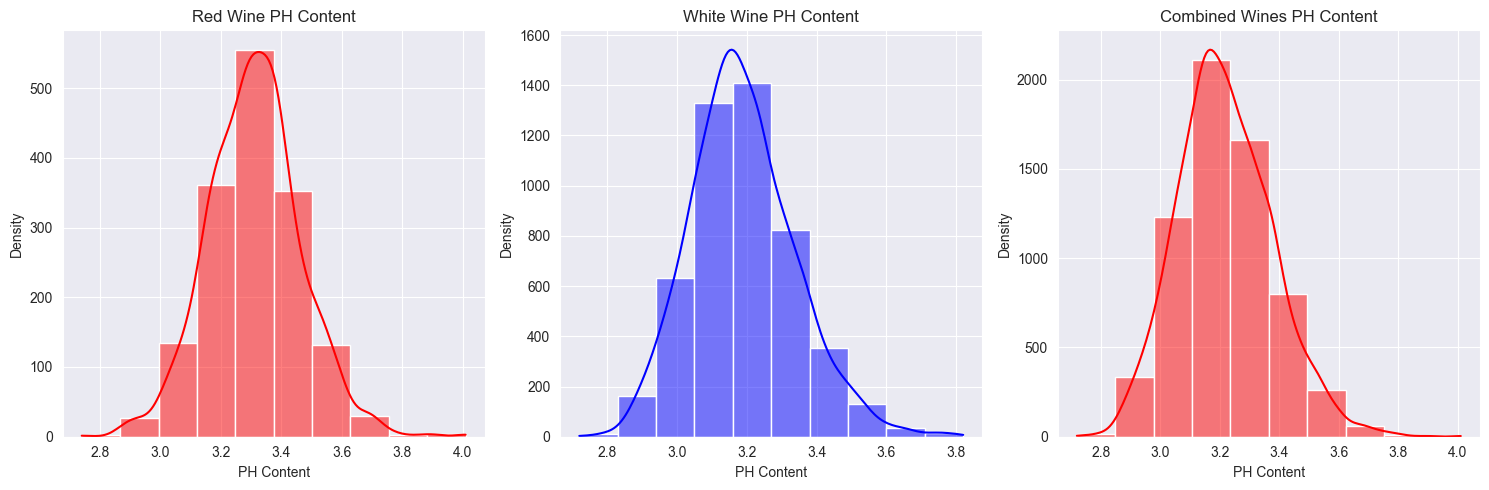

Red Wine:
count    1599.000000
mean        3.311113
std         0.154386
min         2.740000
25%         3.210000
50%         3.310000
75%         3.400000
max         4.010000
Name: pH, dtype: float64
0.19368349811284427
White Wine:
count    4898.000000
mean        3.188267
std         0.151001
min         2.720000
25%         3.090000
50%         3.180000
75%         3.280000
max         3.820000
Name: pH, dtype: float64
0.4577825459180807
Wines
count    6497.000000
mean        3.218501
std         0.160787
min         2.720000
25%         3.110000
50%         3.210000
75%         3.320000
max         4.010000
Name: pH, dtype: float64
0.3868387980608269


In [21]:
def plot_3_distribution(column: str, title_prefix: str):
    plt.figure(figsize=(15, 5))

    # Plot 1: Red Wine Alcohol Content
    plt.subplot(1, 3, 1)
    sns.histplot(data=red_wine, x=column, bins=10, color="red", kde=True)
    plt.title(f"Red Wine {title_prefix} Content")
    plt.xlabel(f"{title_prefix} Content")
    plt.ylabel("Density")

    # Plot 2: White Wine Alcohol Content
    plt.subplot(1, 3, 2)
    sns.histplot(data=white_wine, x=column, bins=10, color="blue", kde=True)
    plt.title(f"White Wine {title_prefix} Content")
    plt.xlabel(f"{title_prefix} Content")
    plt.ylabel("Density")

    # Plot 3: Combined Alcohol Content
    plt.subplot(1, 3, 3)
    sns.histplot(data=wines, x=column, bins=10, color="red", kde=True, alpha=0.5)
    plt.title(f"Combined Wines {title_prefix} Content")
    plt.xlabel(f"{title_prefix} Content")
    plt.ylabel("Density")
    plt.tight_layout()
    plt.show()

    print("Red Wine:")
    print(red_wine[column].describe())
    print(red_wine[column].skew())

    print("White Wine:")
    print(white_wine[column].describe())
    print(white_wine[column].skew())

    print("Wines")
    print(wines[column].describe())
    print(wines[column].skew())


plot_3_distribution("pH", "PH")

##### Analysis Questions:
1. I split it for 3 Ph distribution: for Red Wines, White Whines, and combined. Each distribution is similar to normal, with little positive skewness (biggest for white wine - 0.45)
2. I don't see any outlier or unexpected values.
3. Central tendency measure are visible above. In all examples mean is greater that median as it should be with positive skewness.
4. When distribution is similar to normal it means that, we will be able to perform statistical tests like t-test, linear regression.

### Discrete, categorical attribute in 1-D

## TODO
Visualizing a discrete, categorical data attribute is slightly different and `bar plots` are one of the most effective ways to do the same. Use it, to visualiza `quality`.

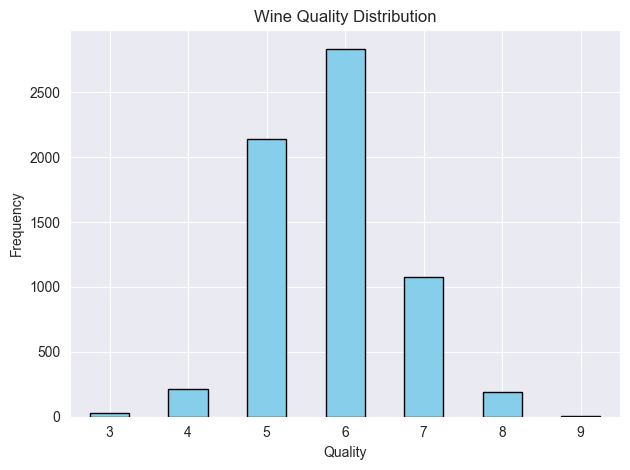

         count  percentage
quality                   
3           30    0.461752
4          216    3.324611
5         2138   32.907496
6         2836   43.650916
7         1079   16.607665
8          193    2.970602
9            5    0.076959
count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64


In [22]:
# Creating a bar plot for the 'quality' attribute, showing counts for each category.
wines["quality"].value_counts().sort_index().plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Wine Quality Distribution")
plt.xlabel("Quality")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

cat_percentage = pd.DataFrame(wines["quality"].value_counts().sort_index())
cat_percentage["percentage"] = cat_percentage["count"].apply(lambda x: x / wines["quality"].value_counts().sum() * 100)
print(cat_percentage)
print(wines["quality"].describe())

##### Analysis Questions:
1. Shape of distribution is similar to normal, but as it is for discrete values it can't be normal distribution but Poisson distribution.
2. Quality 3 and 9 at first sight can be named outlier, but I believe they are a minor classes.
3. Central tendency measure are visible above.
4. Minority of classes 3 and 9 make this feature unbalanced what can cause serious problem in modelling. We should take a look into it and decide how to deal with it e.g use some data augmentation technique like SMOTE.

# Exercise 3: Multivariate Analysis


# Multivariate Analysis

Multivariate analysis is where the fun as well as the complexity begins. Here we analyze multiple data dimensions or attributes (2 or more). Multivariate analysis not only involves just checking out distributions but also potential relationships, patterns and correlations amongst these attributes.

## Visualizing two dimensions

## TODO

One of the best ways to check out potential relationships or correlations amongst the different data attributes is to leverage a pair-wise correlation matrix (pandas `corr`) and depict it as a seaborn `heatmap`. Do it ;)

Creating a correlation matrix for Red Wine wines


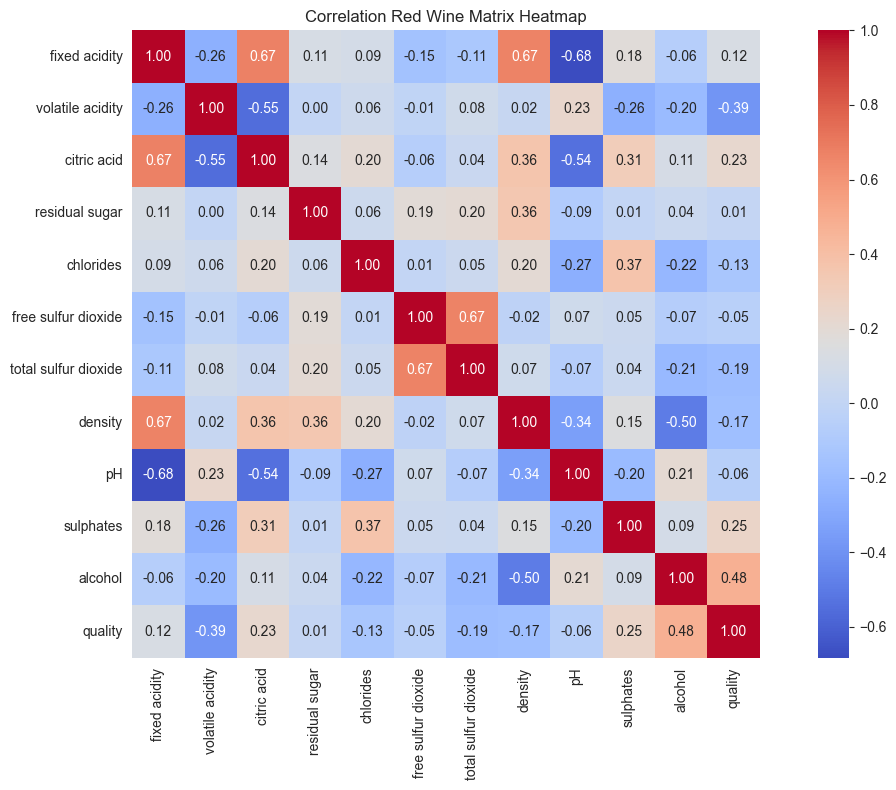

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64
Creating a correlation matrix for White Wine wines


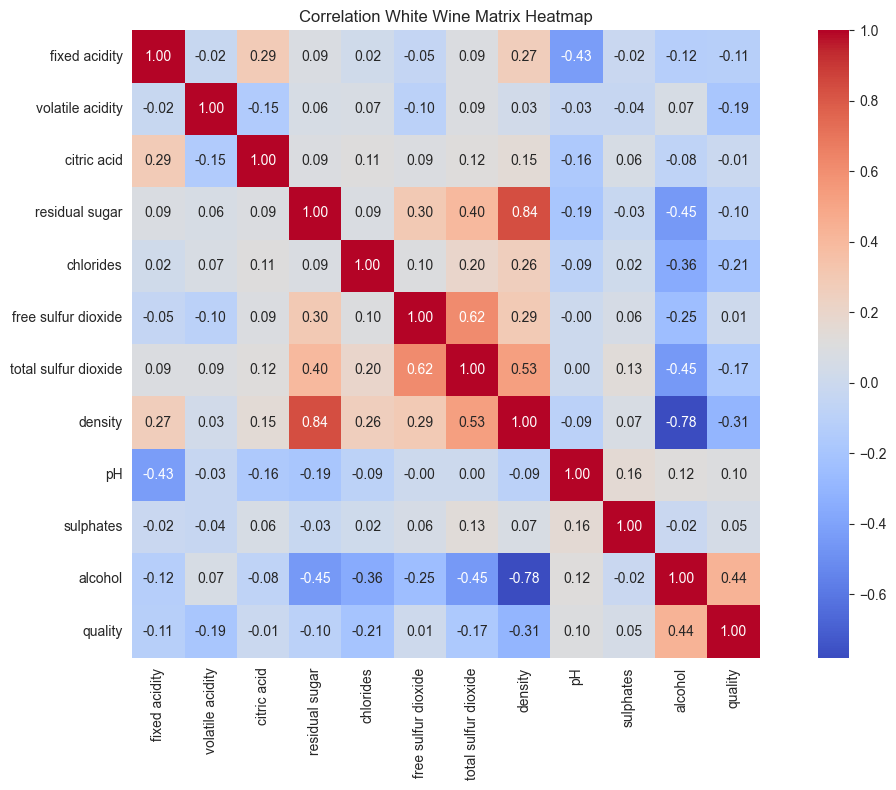

density                -0.307123
chlorides              -0.209934
volatile acidity       -0.194723
total sulfur dioxide   -0.174737
fixed acidity          -0.113663
residual sugar         -0.097577
citric acid            -0.009209
free sulfur dioxide     0.008158
sulphates               0.053678
pH                      0.099427
alcohol                 0.435575
quality                 1.000000
Name: quality, dtype: float64
Creating a correlation matrix for Combine Wines wines


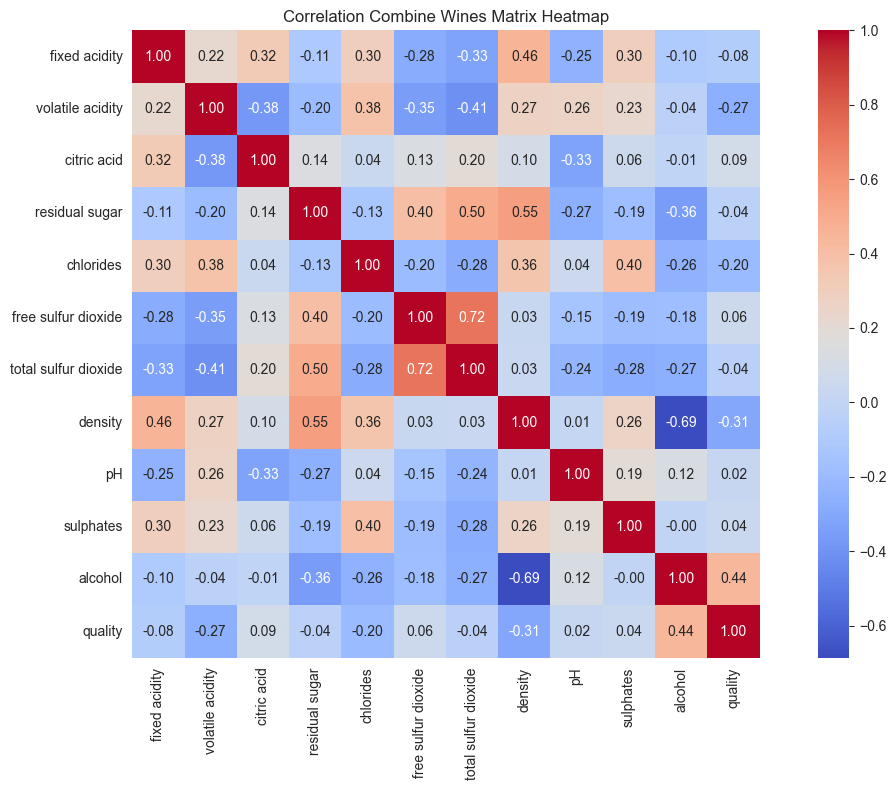

density                -0.305858
volatile acidity       -0.265699
chlorides              -0.200666
fixed acidity          -0.076743
total sulfur dioxide   -0.041385
residual sugar         -0.036980
pH                      0.019506
sulphates               0.038485
free sulfur dioxide     0.055463
citric acid             0.085532
alcohol                 0.444319
quality                 1.000000
Name: quality, dtype: float64


In [28]:
# Creating a correlation matrix for all numeric features
def create_correlation_matrix(df, wine_type):
    print(f"Creating a correlation matrix for {wine_type} wines")
    correlation_matrix = df.select_dtypes(include=np.number).corr()


    # Displaying the correlation matrix as a heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
    plt.title(f"Correlation {wine_type} Matrix Heatmap")
    plt.tight_layout()
    plt.show()

    print(correlation_matrix["quality"].sort_values())


create_correlation_matrix(red_wine, "Red Wine")
create_correlation_matrix(white_wine, "White Wine")
create_correlation_matrix(wines, "Combine Wines")

##### Analysis Questions:
1. For red wines, the strongest correlation we have between citric acid and fixed acidity equal to 0.67. For white wines between density and residual sugars equal to 0.84. Seems that at average, for white wines we have stronger correlation for its features.
3. For Red Wines, White Wines and Combined, alcohol appears to be most strongly associated with wine quality.
4. I didn't notice any.

## TODO

The gradients in the heatmap vary based on the strength of the correlation and you can clearly see it is very easy to spot potential attributes having strong correlations amongst themselves. Another way to visualize the same is to use pair-wise scatter plots amongst attributes of interest.

Use seaborn `pairplot` to plot correlation between 4 columns of your choosing (e.g. `cols = ['density', 'residual sugar', 'total sulfur dioxide', 'fixed acidity']`)

<Figure size 1200x1200 with 0 Axes>

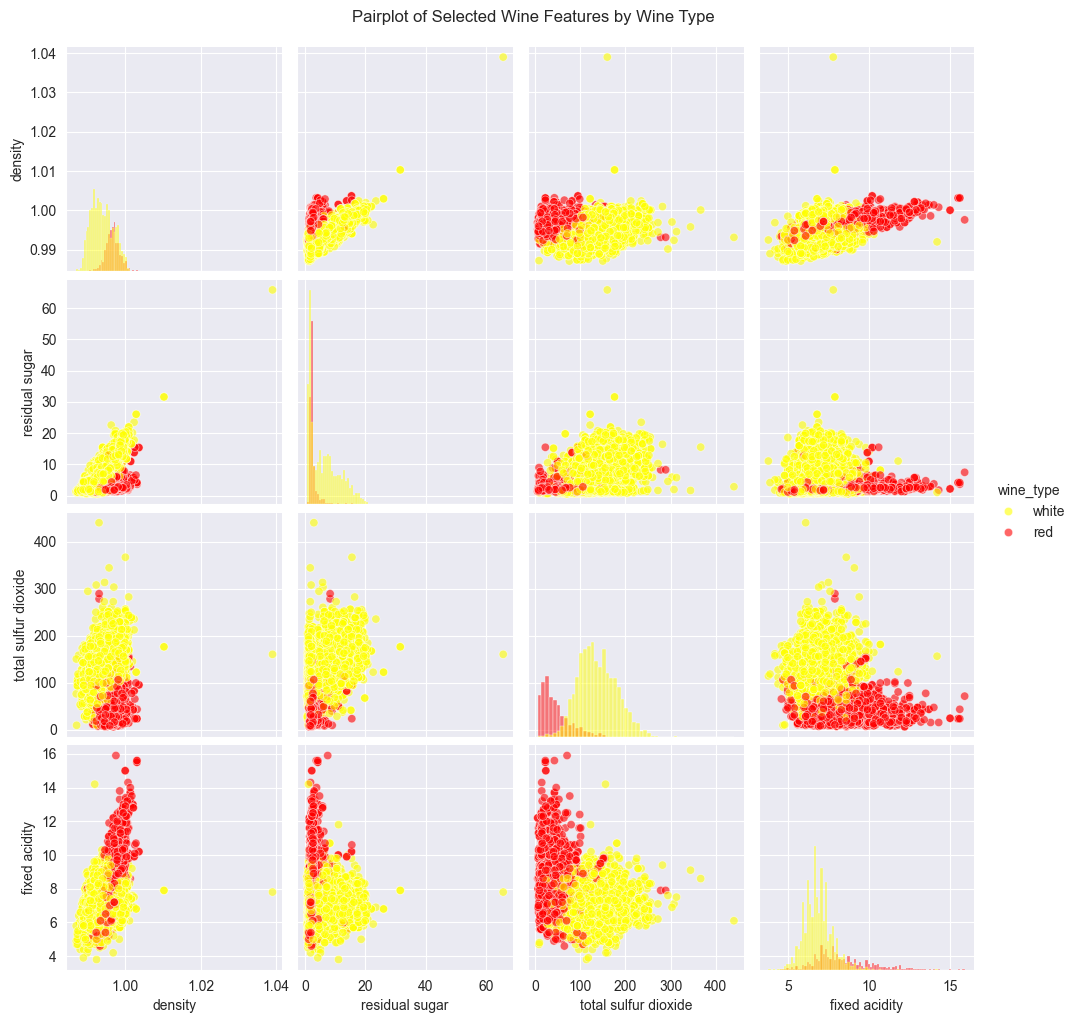

In [34]:
import seaborn as sns

# Wybrane kolumny do analizy
selected_cols = ['density', 'residual sugar', 'total sulfur dioxide', 'fixed acidity']


# Tworzenie pairplot
plt.figure(figsize=(12, 12))
sns.pairplot(data=wines,
             vars=selected_cols,
             hue='wine_type',
             diag_kind='hist',
             plot_kws={'alpha': 0.6},
             palette={'red': 'red', 'white': 'yellow'})

plt.suptitle('Pairplot of Selected Wine Features by Wine Type', y=1.02)
plt.show()



##### Analysis Questions:
Based on above plots, we can see that there are some clusters based on wine type. I believe that the clearest separation between wine types is on `fixed acidity` and `total sulfur dioxide` features.

## TODO

Yet another way of visualizing multivariate data for multiple attributes together is to use parallel coordinates.

`from pandas.plotting import parallel_coordinates`

To do it, it's recommended to scale your data accordingly before plotting. Use `StandardScaler` from `sklearn`.


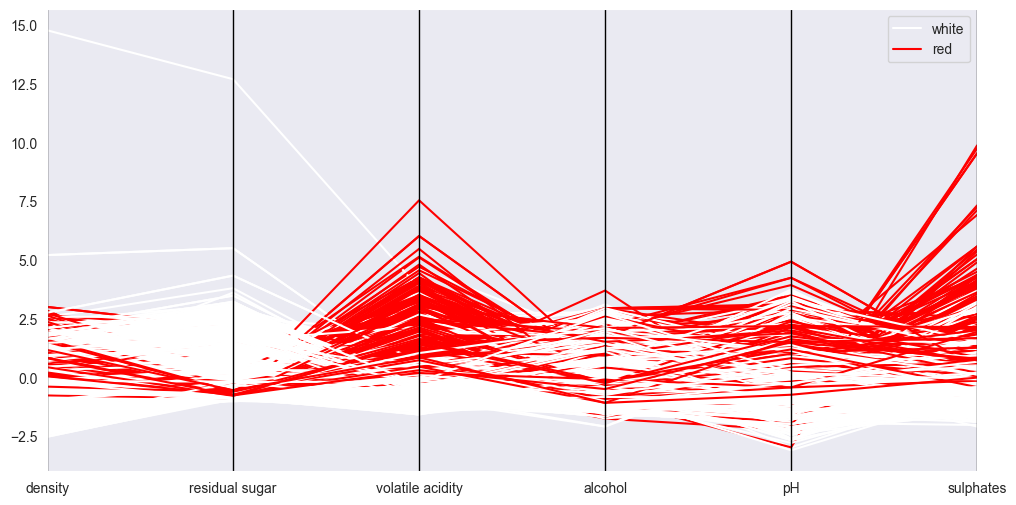

In [81]:
# Scale the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
selected_features = ['density', 'residual sugar', 'volatile acidity', 'alcohol', "pH", "sulphates"]
X = wines[selected_features]

X_scaled = scaler.fit_transform(X)

# Create new DataFrame with scaled values
X_scaled = pd.DataFrame(X_scaled, columns=selected_features).reset_index(drop=True)
X_scaled['wine_type'] = wines['wine_type'].reset_index(drop=True)


plt.figure(figsize=(12, 6))
pd.plotting.parallel_coordinates(X_scaled, "wine_type", color=["white", "red"])
plt.show()


##### Analysis Questions:
Looking in that plot, we can confirm conclusion from previous observation. E.g mean `volatile acidity` for red wines is 0.53 when for white wines is 0.28. Based on the plot, we can see that for `volatile acidity` values for red wines are above white wines. For `residual sugar` there is opposite situation - white wines are above red wines (red wines mean: 2.54 , white wines mean: 6.39).

### Two Continuous Numeric attributes

## TODO

To visualize two continuous, numeric attributes, we can use scatter plots and joint plots. The second one in particular are good to not only check for patterns, relationships but also see the individual distributions for the attributes.

Choose two proper attributes (e.q. `sulphates` and `alcohol`) and plot it with scatter plot and jointplot.

Analysis for : Red Wine


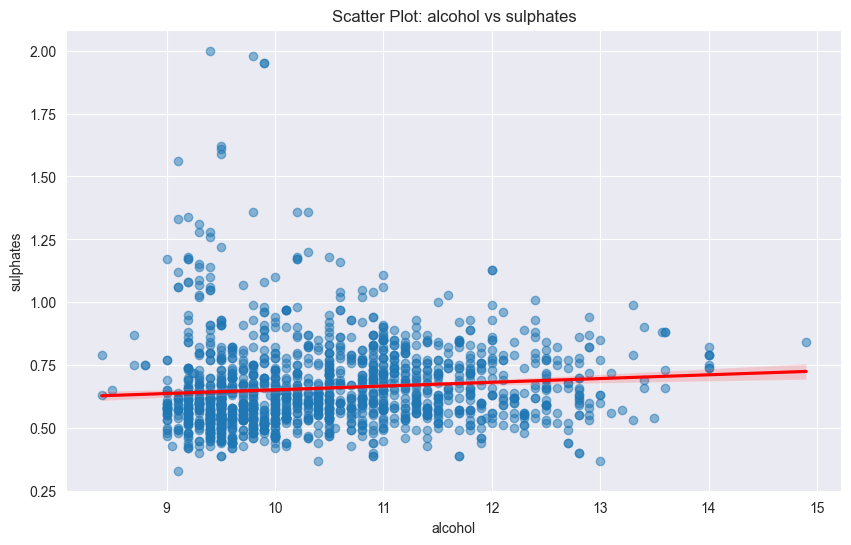

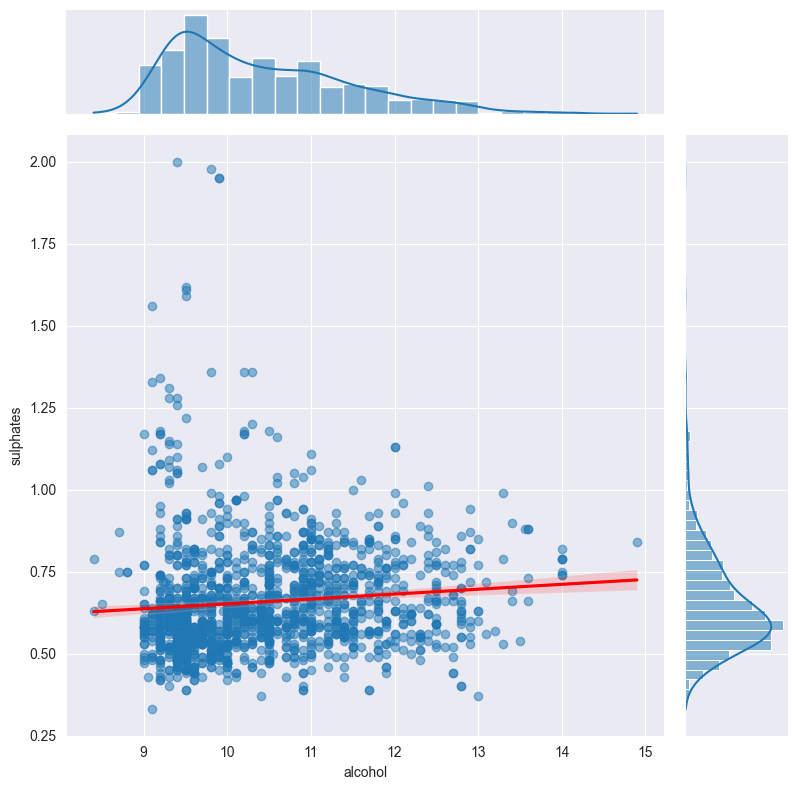


Correlation Analysis:
Pearson correlation coefficient: 0.0936
P-value: 1.7831e-04
Analysis for : White Wine


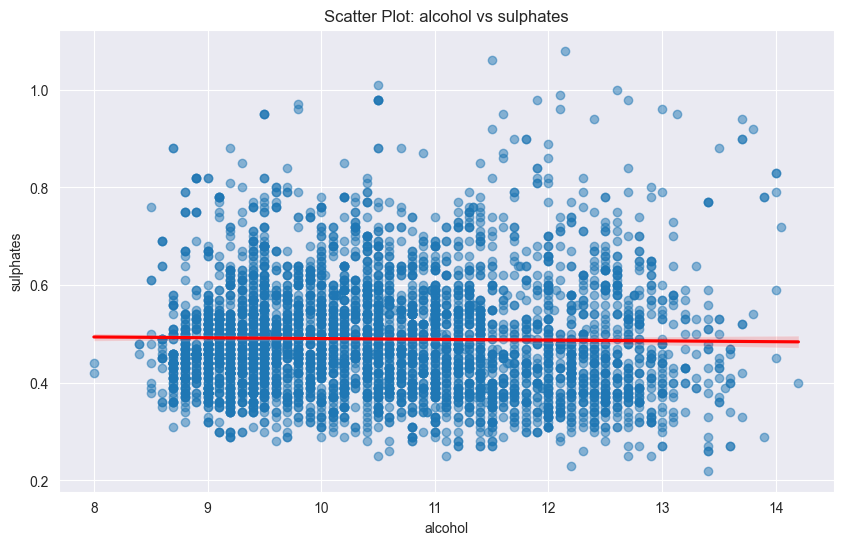

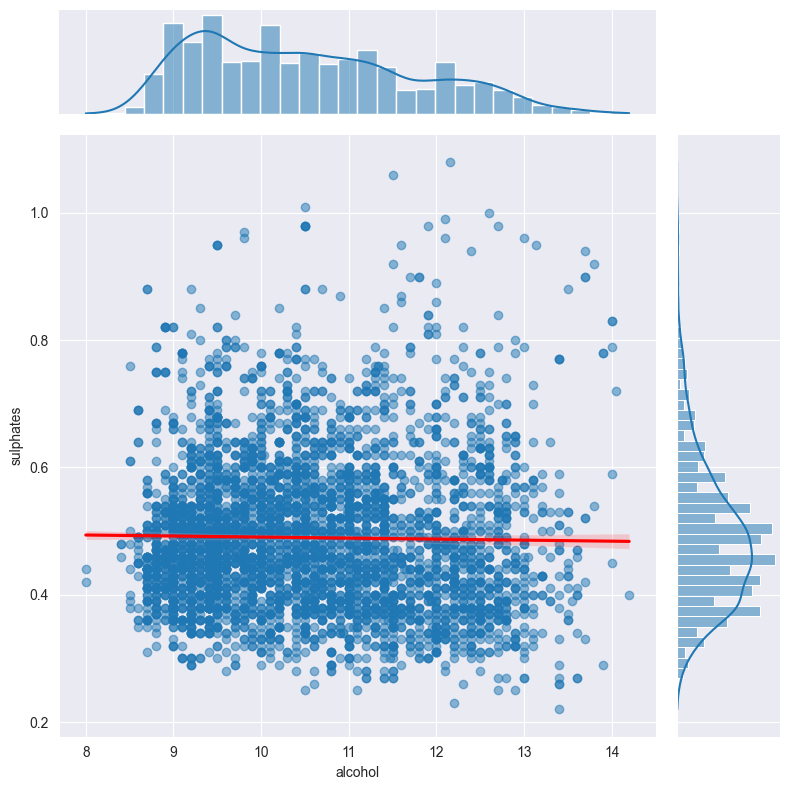


Correlation Analysis:
Pearson correlation coefficient: -0.0174
P-value: 2.2253e-01


In [90]:
# %%
# Import required libraries
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

def plot_scatter_joinplot(df, attribute1, attribute2, type):
    print(f"Analysis for : {type}")
    # Create scatter plot with regression line
    plt.figure(figsize=(10, 6))
    sns.regplot(data=df, x=attribute1, y=attribute2,
                scatter_kws={'alpha': 0.5},
                line_kws={'color': 'red'})
    plt.title(f'Scatter Plot: {attribute1} vs {attribute2}')
    plt.show()

    # Create joint plot
    sns.jointplot(data=df, x=attribute1, y=attribute2,
                  kind='reg', height=8,
                  scatter_kws={'alpha': 0.5},
                  line_kws={'color': 'red'})
    plt.show()

    # Calculate correlation coefficient
    correlation = df[attribute1].corr(df[attribute2])
    # Calculate p-value
    pearson_coef, p_value = stats.pearsonr(df[attribute1], df[attribute2])

    print(f"\nCorrelation Analysis:")
    print(f"Pearson correlation coefficient: {correlation:.4f}")
    print(f"P-value: {p_value:.4e}")

plot_scatter_joinplot(red_wine, "alcohol", "sulphates", "Red Wine")
plot_scatter_joinplot(white_wine, "alcohol", "sulphates", "White Wine")


##### Analysis Questions:
For Red wine, `sulphates` feature seems to have smaller standard deviation which implies that it is easier to fit regression line to it. For red wines, Pearson correlation coefficient is positive so our regression line is growing together with alcohol growth. For White wines, pearson correlation coefficient is negative.

### Two Discrete Categorical attributes 

To visualize two discrete, categorical attributes we can leverage separate plots (subplots) or facets for one of the categorical dimensions.



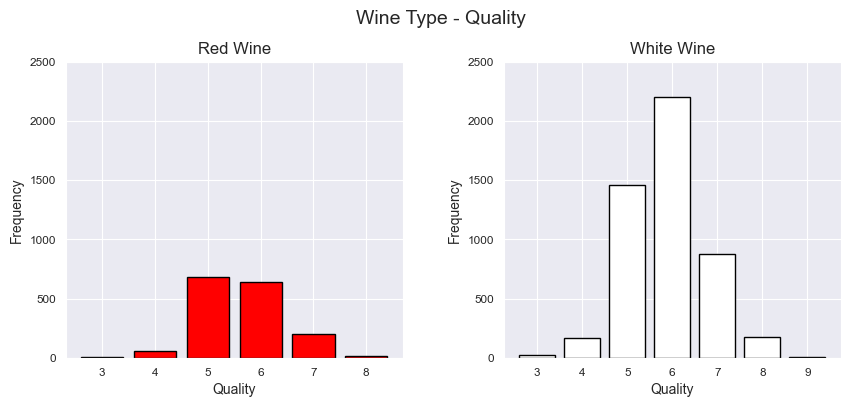

In [91]:
fig = plt.figure(figsize = (10, 4))
title = fig.suptitle("Wine Type - Quality", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,2, 1)
ax1.set_title("Red Wine")
ax1.set_xlabel("Quality")
ax1.set_ylabel("Frequency") 
rw_q = red_wine['quality'].value_counts()
rw_q = (list(rw_q.index), list(rw_q.values))
ax1.set_ylim([0, 2500])
ax1.tick_params(axis='both', which='major', labelsize=8.5)
bar1 = ax1.bar(rw_q[0], rw_q[1], color='red', 
        edgecolor='black', linewidth=1)


ax2 = fig.add_subplot(1,2, 2)
ax2.set_title("White Wine")
ax2.set_xlabel("Quality")
ax2.set_ylabel("Frequency") 
ww_q = white_wine['quality'].value_counts()
ww_q = (list(ww_q.index), list(ww_q.values))
ax2.set_ylim([0, 2500])
ax2.tick_params(axis='both', which='major', labelsize=8.5)
bar2 = ax2.bar(ww_q[0], ww_q[1], color='white', 
        edgecolor='black', linewidth=1)

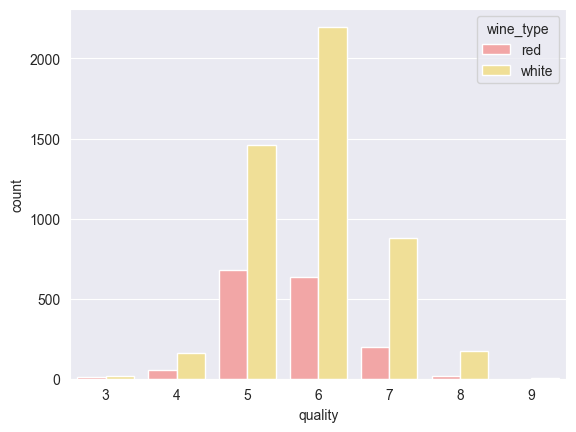

In [92]:
cp = sns.countplot(x="quality", hue="wine_type", data=wines, 
                   palette={"red": "#FF9999", "white": "#FFE888"})

### Mixed attributes (numeric & categorical)

To visualize mixed attributes in two-dimensions (essentially numeric and categorical together), we cab use faceting\subplots along with generic histograms or density plots.

Use example above to plot "Sulphates content in wine" histograms and facets (`Frequency`/`Density` and `Sulphates` as axis) for different types of wine.

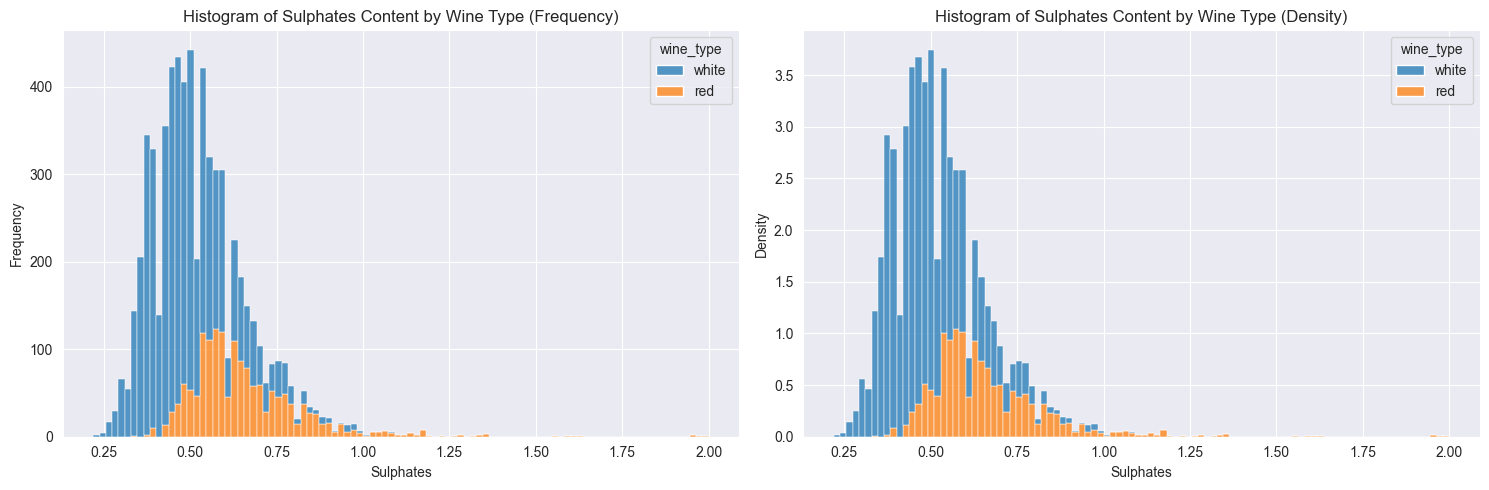

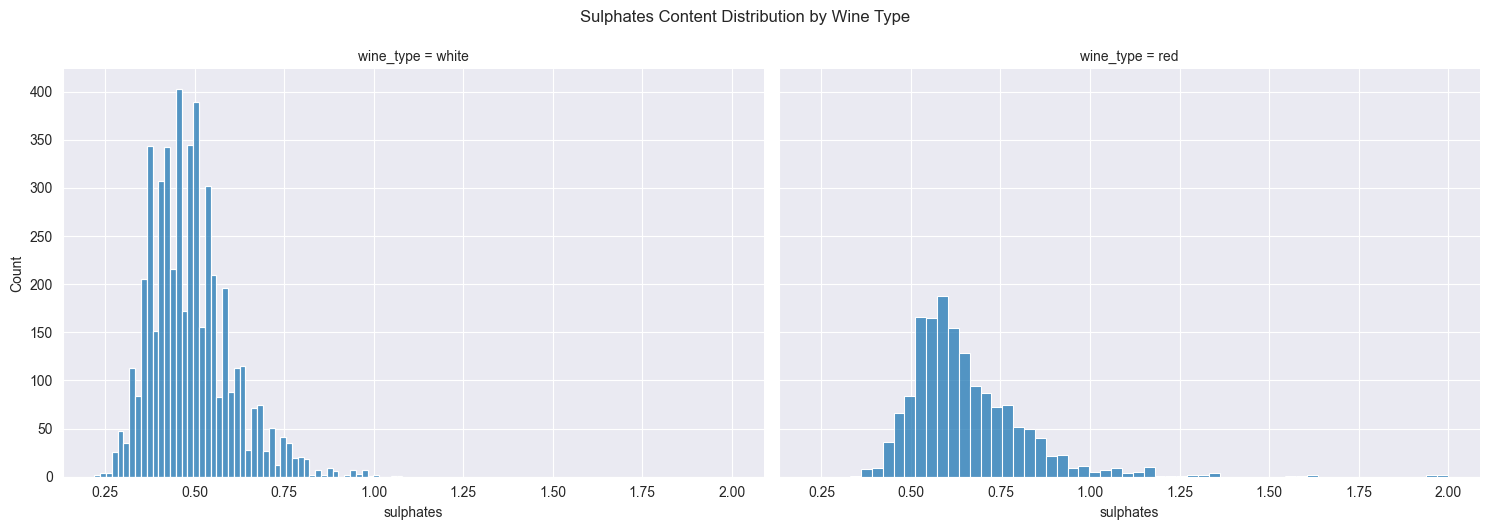

In [95]:
# %%
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot histogram with frequency
sns.histplot(data=wines, x='sulphates', hue='wine_type', multiple="stack", ax=ax1)
ax1.set_title('Histogram of Sulphates Content by Wine Type (Frequency)')
ax1.set_xlabel('Sulphates')
ax1.set_ylabel('Frequency')

# Plot histogram with density
sns.histplot(data=wines, x='sulphates', hue='wine_type', multiple="stack",
             stat="density", ax=ax2)
ax2.set_title('Histogram of Sulphates Content by Wine Type (Density)')
ax2.set_xlabel('Sulphates')
ax2.set_ylabel('Density')

plt.tight_layout()
plt.show()

# Alternative: Using FacetGrid for separate plots
g = sns.FacetGrid(wines, col="wine_type", height=5, aspect=1.5)
g.map_dataframe(sns.histplot, x="sulphates")
g.fig.suptitle('Sulphates Content Distribution by Wine Type', y=1.05)
plt.show()


##### Analysis Questions:
For red wine, distribution is little shift to right in compare to whine wines which can implies that for red wines `suplhates` have greater skewness.

## TODO 

Box plots are effective in depicting groups of numeric data based on the different values in the categorical attribute. Additionally, they are a good way to know the quartile values in the data and also potential outliers.

Plot a `boxplot` for `quality` and `alcohol` as axis. Then do the same for `violinplot` and verify the differences between the two.

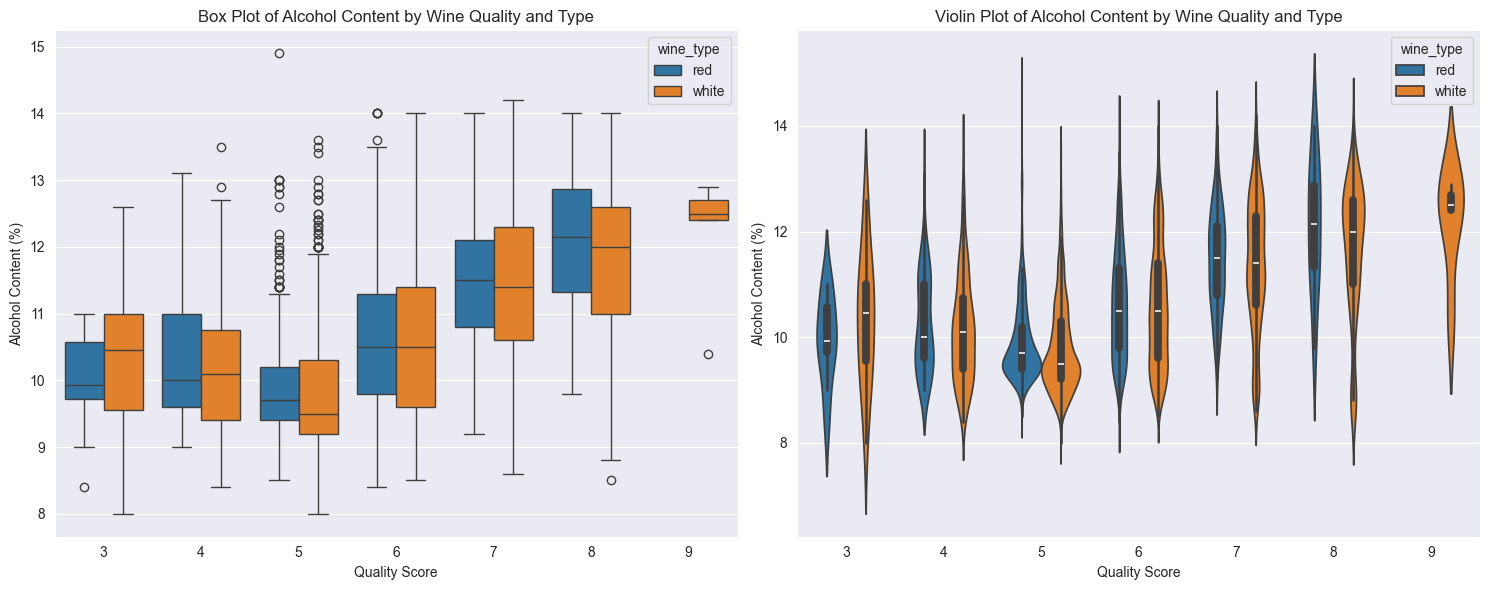


Summary statistics for each quality level and wine type:
                    count       mean       std   min     25%     50%     75%  \
wine_type quality                                                              
red       3          10.0   9.955000  0.818009   8.4   9.725   9.925  10.575   
          4          53.0  10.265094  0.934776   9.0   9.600  10.000  11.000   
          5         681.0   9.899706  0.736521   8.5   9.400   9.700  10.200   
          6         638.0  10.629519  1.049639   8.4   9.800  10.500  11.300   
          7         199.0  11.465913  0.961933   9.2  10.800  11.500  12.100   
          8          18.0  12.094444  1.224011   9.8  11.325  12.150  12.875   
white     3          20.0  10.345000  1.224089   8.0   9.550  10.450  11.000   
          4         163.0  10.152454  1.003217   8.4   9.400  10.100  10.750   
          5        1457.0   9.808840  0.847065   8.0   9.200   9.500  10.300   
          6        2198.0  10.575372  1.147776   8.5   9.600  

In [99]:
# %%
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Create box plot with both wine types
sns.boxplot(data=wines, x='quality', y='alcohol', hue='wine_type', ax=ax1)
ax1.set_title('Box Plot of Alcohol Content by Wine Quality and Type')
ax1.set_xlabel('Quality Score')
ax1.set_ylabel('Alcohol Content (%)')

# Create violin plot with both wine types
sns.violinplot(data=wines, x='quality', y='alcohol', hue='wine_type', ax=ax2)
ax2.set_title('Violin Plot of Alcohol Content by Wine Quality and Type')
ax2.set_xlabel('Quality Score')
ax2.set_ylabel('Alcohol Content (%)')

plt.tight_layout()
plt.show()

# Print summary statistics for each quality level and wine type
print("\nSummary statistics for each quality level and wine type:")
print(wines.groupby(['wine_type', 'quality'])['alcohol'].describe())


##### Analysis Questions:
For white wines, `alcohol` feature for particular `quality` have bigger standard deviation, as box plots are bigger (it is also confirmed in statistic summary). For some `quality` it seems that there are values outside IQR which potentially can be outliers.

# Exercise 4: Multidimensional Visualization

## Visualizing three dimensions

We can visualize them by considering a pair-wise scatter plot and introducing the notion of color or hue to separate out values in a categorical dimension.

Plot 5 columns of your choosing with `wine_type` (one of columns) as 3rd dimension.

### Three Continuous Numeric attributes

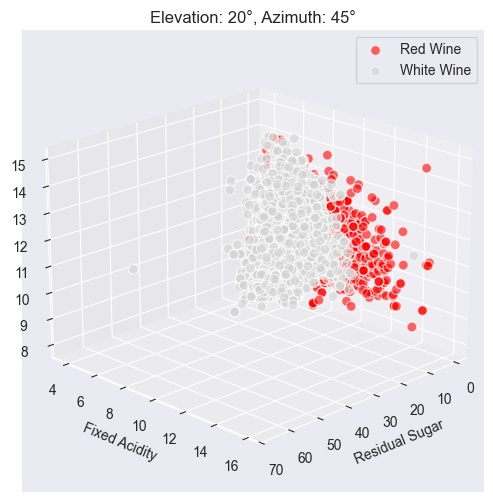

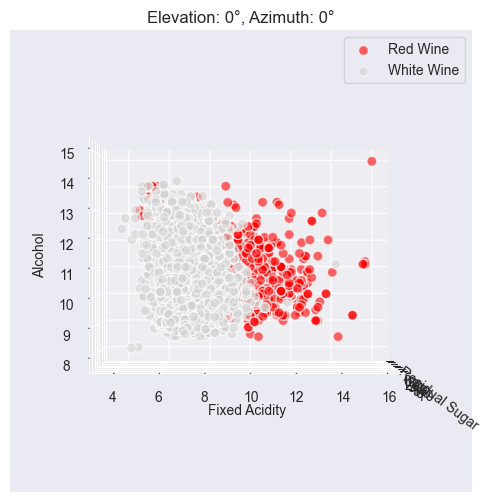

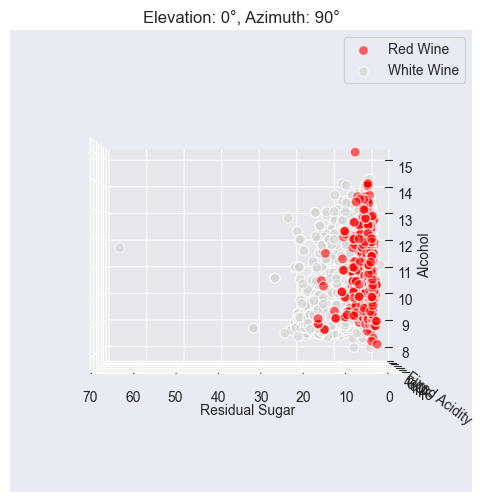

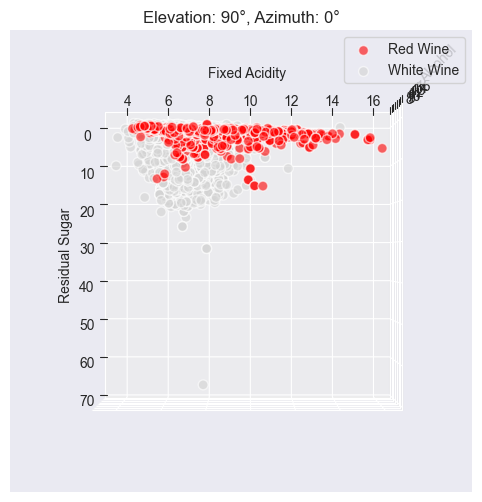

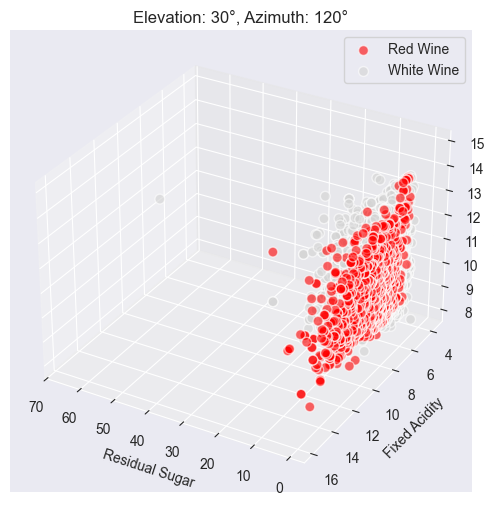

In [126]:
# %%
def plot_3d_wine_data(elev, azim):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Create masks for each wine type
    red_mask = wines['wine_type'] == 'red'
    white_mask = wines['wine_type'] == 'white'

    # Plot red wines
    ax.scatter(wines[red_mask]['residual sugar'],
               wines[red_mask]['fixed acidity'],
               wines[red_mask]['alcohol'],
               s=50, alpha=0.6, edgecolors='w',
               c='red', label='Red Wine')

    # Plot white wines
    ax.scatter(wines[white_mask]['residual sugar'],
               wines[white_mask]['fixed acidity'],
               wines[white_mask]['alcohol'],
               s=50, alpha=0.6, edgecolors='w',
               c='lightgray', label='White Wine')

    ax.set_xlabel('Residual Sugar')
    ax.set_ylabel('Fixed Acidity')
    ax.set_zlabel('Alcohol')

    # Set viewing angle
    ax.view_init(elev=elev, azim=azim)

    # Add legend
    ax.legend()

    plt.title(f'Elevation: {elev}°, Azimuth: {azim}°')
    plt.show()


# Show plot from different angles
angles = [
    (20, 45),  # Standard view
    (0, 0),  # Front view
    (0, 90),  # Side view
    (90, 0),  # Top view
    (30, 120),  # Another perspective
]

for elev, azim in angles:
    plot_3d_wine_data(elev, azim)


##### Analysis Questions:
 Looking at the data from a different angle, we will probably be able to cluster it into two wine groups based on the `residual sugar` or `fixed acidity` feature but there can be some overlaping in clusters. It seems that it is not possible to cluster by `alcohol`.

## TODO

We can utilize size as the third dimension, where the size of the dots indicate the quantity of the third dimension.

Use `s` parameter of scatter plot to parametrize it by the size. Use `residual sugar` as the size indicator.

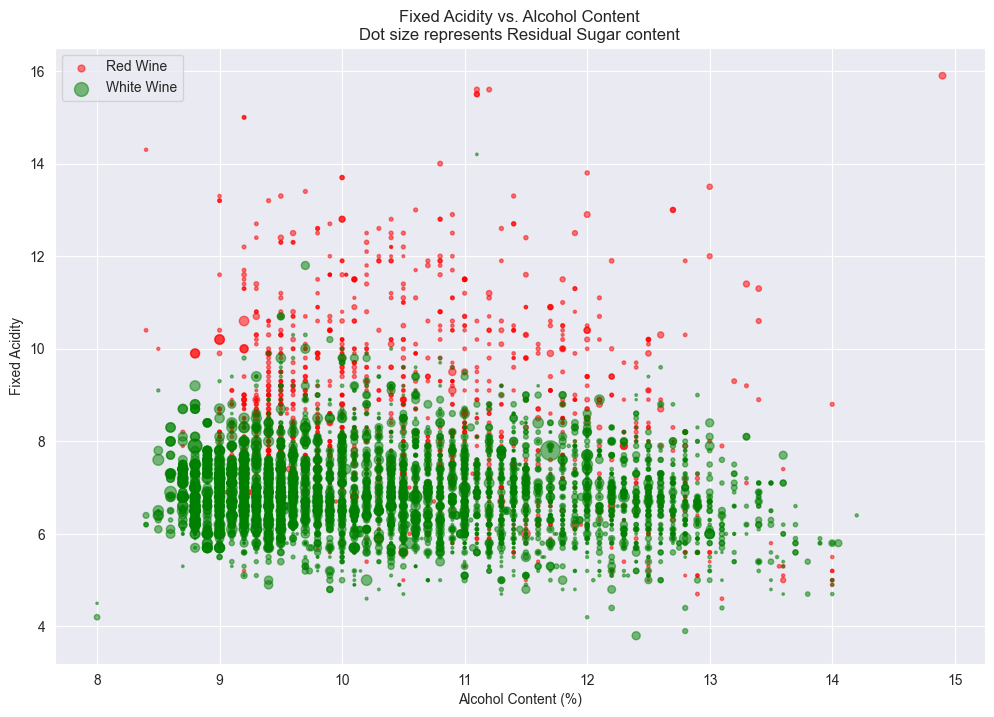

In [124]:
import matplotlib.pyplot as plt


# Create scatter plot with size based on residual sugar
plt.figure(figsize=(12, 8))


sizes = wines['residual sugar'] * 3

# Create scatter plot for each wine type separately to handle legend properly
red_mask = wines['wine_type'] == 'red'
white_mask = wines['wine_type'] == 'white'

# Plot both types with labels
plt.scatter(wines[red_mask]['alcohol'],
            wines[red_mask]['fixed acidity'],
            s=sizes[red_mask],
            c='red',
            alpha=0.5,
            label='Red Wine')

plt.scatter(wines[white_mask]['alcohol'],
            wines[white_mask]['fixed acidity'],
            s=sizes[white_mask],
            c='green',
            alpha=0.5,
            label='White Wine')



# Add legend for wine types
plt.legend()
# Add labels and title
plt.xlabel('Alcohol Content (%)')
plt.ylabel('Fixed Acidity')
plt.title('Fixed Acidity vs. Alcohol Content\nDot size represents Residual Sugar content')
plt.show()

##### Analysis Questions:
 Looking in the plot above there are similar conclusion like in 3d plot: probably we will be able to cluster wine type based on `fixed acidity` or `residual sugar` and probably cannot do that with `alcohol` feature.

### Three Discrete Categorical attributes

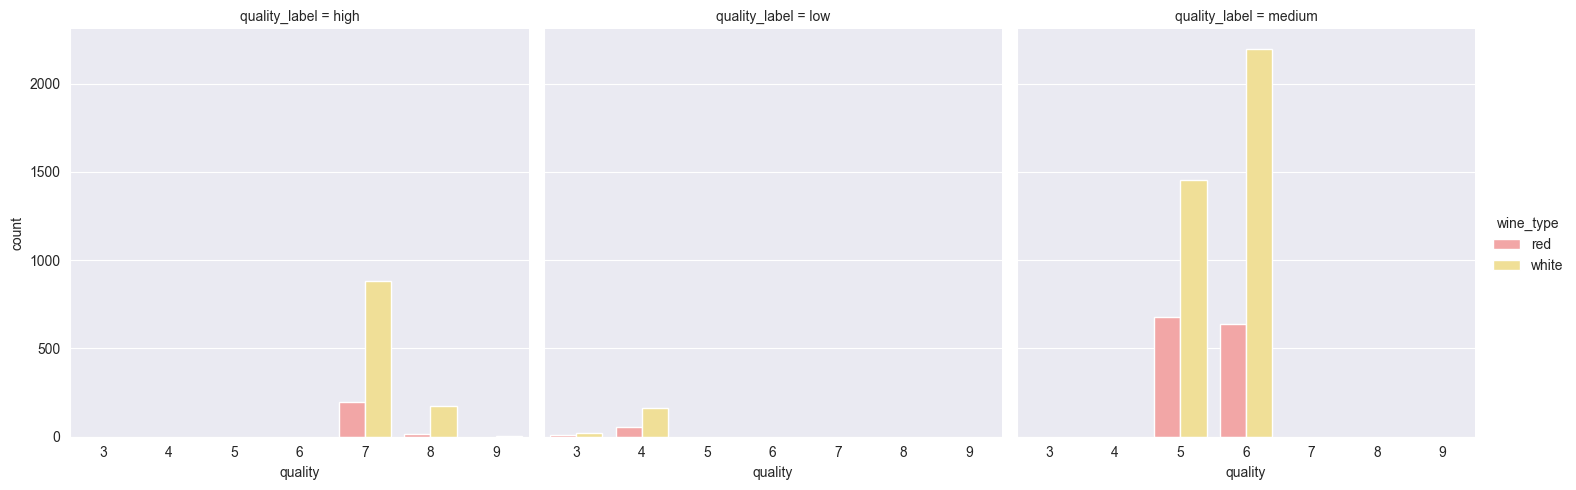

In [121]:
fc = sns.catplot(x="quality", hue="wine_type", col="quality_label",
                    data=wines, kind="count",
                    palette={"red": "#FF9999", "white": "#FFE888"})

### Mixed attributes (Numeric & Categorical)

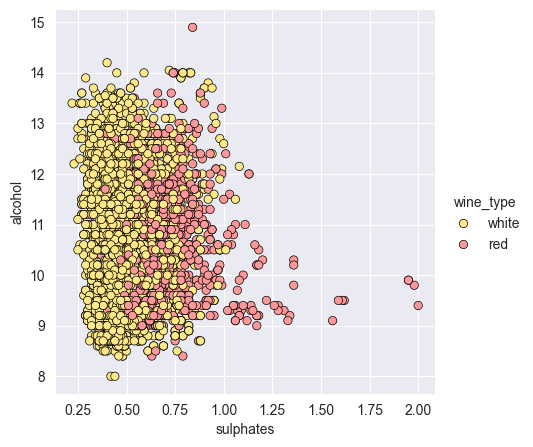

In [129]:
jp = sns.pairplot(wines, x_vars=["sulphates"], y_vars=["alcohol"], height=4.5,
                  hue="wine_type", palette={"red": "#FF9999", "white": "#FFE888"},
                  plot_kws=dict(edgecolor="k", linewidth=0.5))

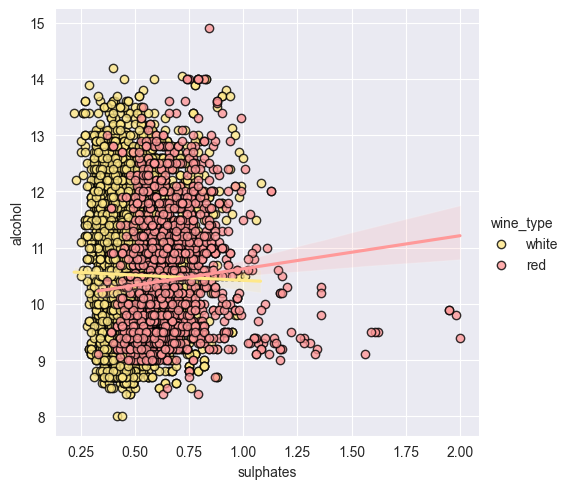

In [131]:
lp = sns.lmplot(x='sulphates', y='alcohol', hue='wine_type', 
                palette={"red": "#FF9999", "white": "#FFE888"},
                data=wines, fit_reg=True, legend=True,
                scatter_kws=dict(edgecolor="k"))

## TODO 

Thus hue acts as a good separator for the categories or groups and while there is no or very weak correlation as observed above, we can still understand from these plots that `sulphates` are slightly higher for red wines as compared to white. 

Instead of a scatter plot, use a kernel density plot (`kdeplot`) to understand the data in three dimensions.

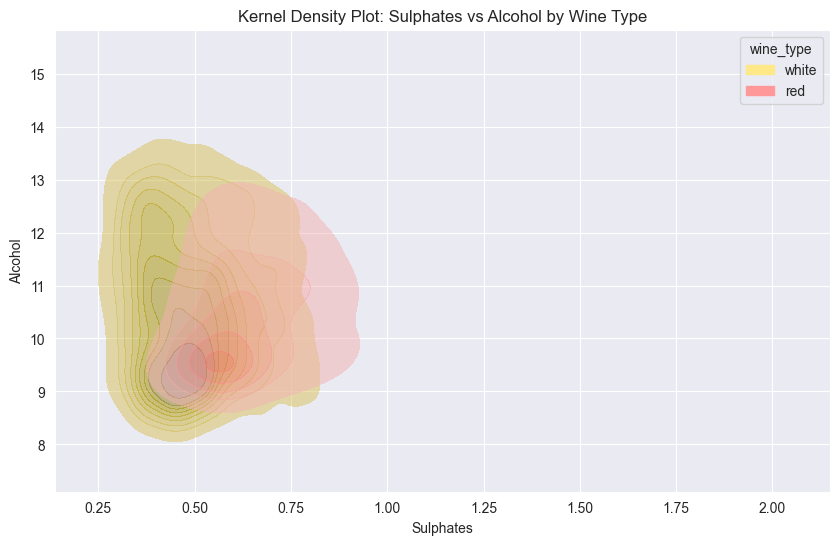

In [138]:
# %%
fig = plt.figure(figsize=(10, 6))

# First plot for sulphates vs alcohol
ax = fig.add_subplot(111)

sns.kdeplot(data=wines,
            x='sulphates',
            y='alcohol',
            hue='wine_type',
            palette={"red": "#FF9999", "white": "#FFE888"},
            fill=True,
            alpha=0.5,
            levels=10)

plt.title('Kernel Density Plot: Sulphates vs Alcohol by Wine Type')
plt.xlabel('Sulphates')
plt.ylabel('Alcohol')

plt.show()


##### Analysis Questions:
 Similar like in scatter, with kde we can observe that `sulphates` are slightly higher for red wines as compared to white

## TODO 

Use hue and one of the regular axes for visualizing data and use visualizations like box plots or violin plots to visualize the different groups of data.

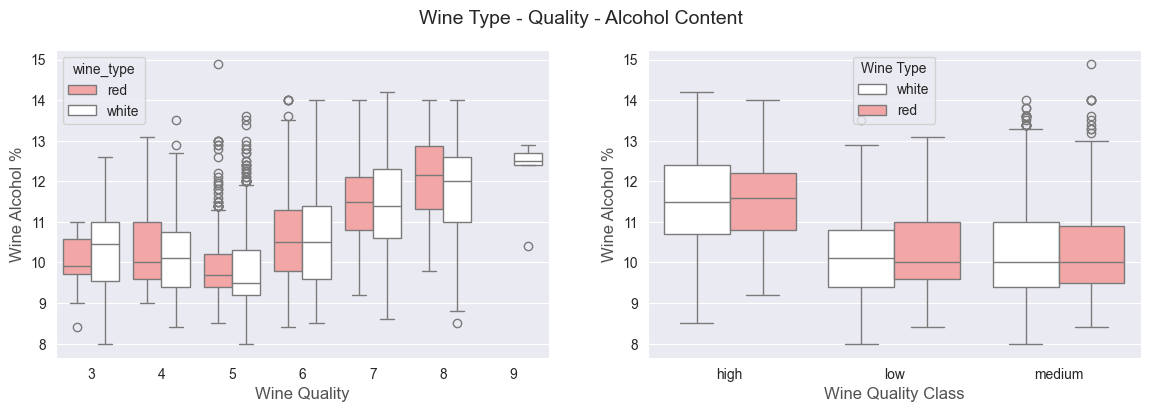

In [140]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
f.suptitle('Wine Type - Quality - Alcohol Content', fontsize=14)

sns.boxplot(x="quality", y="alcohol", hue="wine_type",
               data=wines, palette={"red": "#FF9999", "white": "white"}, ax=ax1)
ax1.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax1.set_ylabel("Wine Alcohol %",size = 12,alpha=0.8)

sns.boxplot(x="quality_label", y="alcohol", hue="wine_type",
               data=wines, palette={"red": "#FF9999", "white": "white"}, ax=ax2)
ax2.set_xlabel("Wine Quality Class",size = 12,alpha=0.8)
ax2.set_ylabel("Wine Alcohol %",size = 12,alpha=0.8)
l = plt.legend(loc='best', title='Wine Type')

## Visualizing four dimensions

We will leverage various components of the charts visualize multiple dimensions. One way to visualize data in four dimensions is to use `depth` and `hue` as specific data dimensions in a conventional plot like a scatter plot.

Use: `xs`, `ys`, `zs` for plot (tips: use `zip`) and specify color by the `wine_type`. 

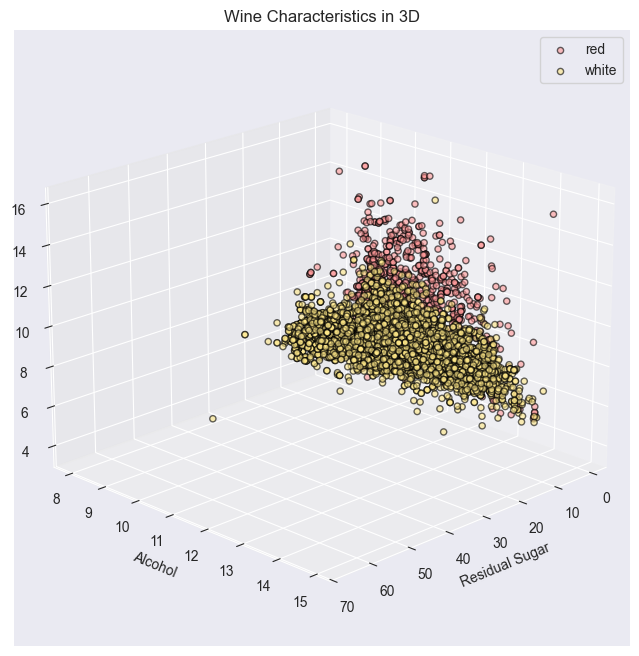

In [150]:
# %%
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Get data for each wine type
for wine_type, color in zip(['red', 'white'], ['#FF9999', '#FFE888']):
    mask = wines['wine_type'] == wine_type

    # Create scatter plot with zip for coordinates
    xs, ys, zs = zip(*wines[mask][['residual sugar', 'alcohol', 'fixed acidity']].values)
    ax.scatter(xs, ys, zs,
               c=color,
               label=wine_type,
               alpha=0.6,
               edgecolor='k')

# Customize the plot
ax.set_xlabel('Residual Sugar')
ax.set_ylabel('Alcohol')
ax.set_zlabel('Fixed Acidity')
ax.legend()
plt.title('Wine Characteristics in 3D')

# Add different viewing angles
ax.view_init(elev=20, azim=45)
plt.show()

# Show another perspective
ax.view_init(elev=40, azim=110)
plt.show()


##### Analysis Questions:
Seems that there is relationship between wine type with `residual sugar` and there is no for `alcohol`. It is tough to say for `fixed acidity` based on that plot.

## TODO 

Another strategy is to keep a 2-D plot but use hue and data point size as data dimensions. Typically this would be a bubble chart similar to what we visualized earlier. Create bubble plot with specified size and color.

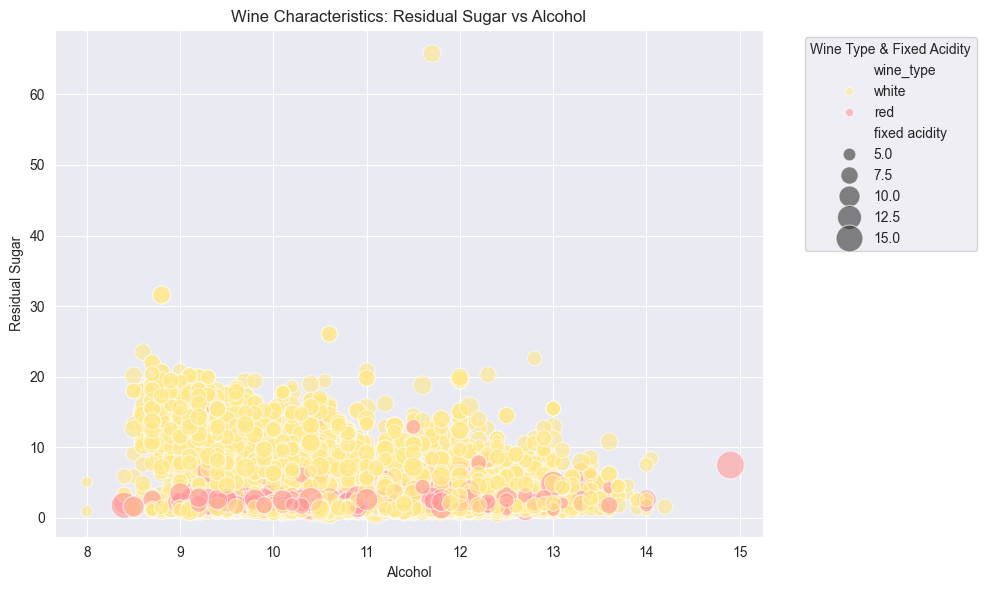

In [155]:
# %%
plt.figure(figsize=(10, 6))

# Create scatter plot using seaborn
sns.scatterplot(data=wines,
                x='alcohol',
                y='residual sugar',
                hue='wine_type',
                size='fixed acidity',
                sizes=(50, 400),  # Min and max size of points
                palette={"red": "#FF9999", "white": "#FFE888"},
                alpha=0.6)

plt.title('Wine Characteristics: Residual Sugar vs Alcohol')
plt.xlabel('Alcohol')
plt.ylabel('Residual Sugar')

# Adjust legend position
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Wine Type & Fixed Acidity')
plt.tight_layout()
plt.show()


##### Analysis Questions:
There are similar conclusions like in 3d plot above, seems that there is relationship between wine type with `residual sugar` and there is no for `alcohol`. It is tough to say for `fixed acidity` based on that plot.

## TODO
If we have more that two categorical attributes to represent, we can reuse our concept of leveraging hue and facets to depict these attributes and regular plots like scatter plots to represent the numeric attributes. Use `FaceGrid` to plot a 4-D mix data using scatter plots leveraging the concepts of hue and facets for > 1 categorical attributes. Use `map` method of the `FaceGrid` object. Compare different attributes. For example "volatile acidity", "alcohol" and "volatile acidity", "total sulfur dioxide".

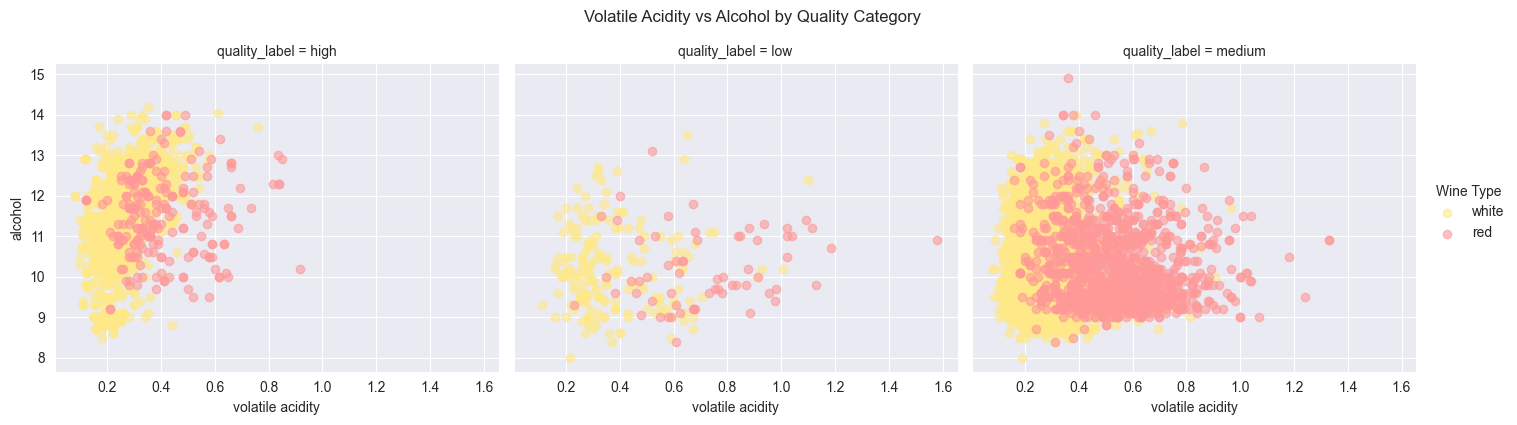

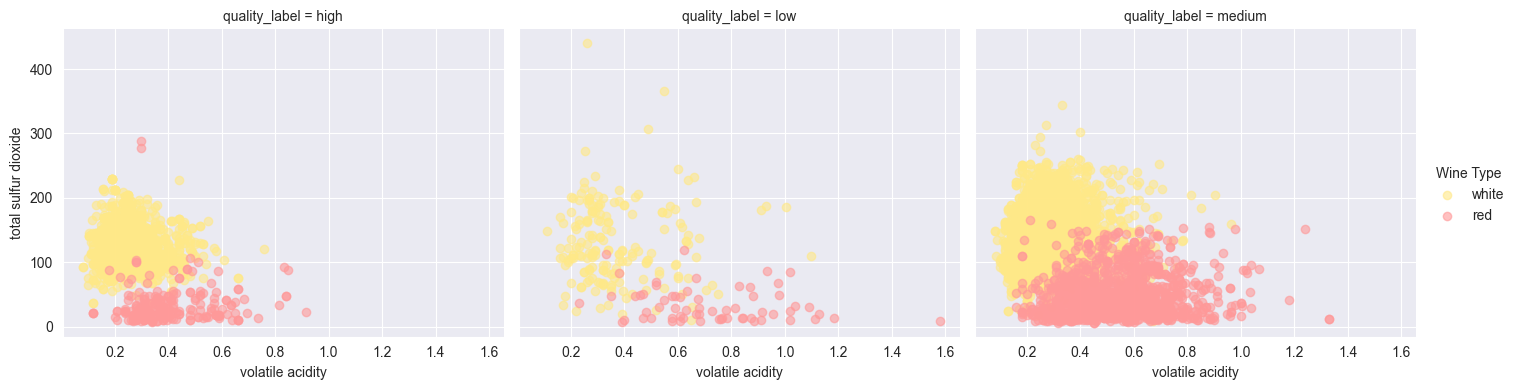

In [161]:

g1 = sns.FacetGrid(wines,
                   col='quality_label',
                   hue='wine_type',
                   palette={"red": "#FF9999", "white": "#FFE888"},
                   height=4,
                   aspect=1.2)

g1.map(plt.scatter, 'volatile acidity', 'alcohol', alpha=0.6)
g1.add_legend(title='Wine Type')
g1.fig.suptitle('Volatile Acidity vs Alcohol by Quality Category', y=1.05)

plt.show()


g2 = sns.FacetGrid(wines,
                   col='quality_label',
                   hue='wine_type',
                   palette={"red": "#FF9999", "white": "#FFE888"},
                   height=4,
                   aspect=1.2)

g2.map(plt.scatter, 'volatile acidity', 'total sulfur dioxide', alpha=0.6)
g2.add_legend(title='Wine Type')
g1.fig.suptitle('Volatile Acidity vs Total Sulfur Dioxide by Quality Category', y=1.05)


plt.show()


##### Analysis Questions:
Faceting concept is useful when our dimension increases. Splitting dimension to additional plot help to observe relationship between variables like above, I would say that there is an option to cluster wine type based on relation between `total sulfur dioxide` and `volatile acidity`. Interpret in 4d plot probably will be more difficult.

## Visualizing five dimensions

Once again following a similar strategy as we followed in the previous section, to visualize data in five dimensions, we leverage various plotting components. Let’s use depth, hue and size to represent three of the data dimensions besides regular axes representing the other two dimensions. Since we use the notion of size, we will be basically plotting a three dimensional bubble chart.

Text(0.5, 0, 'Fixed Acidity')

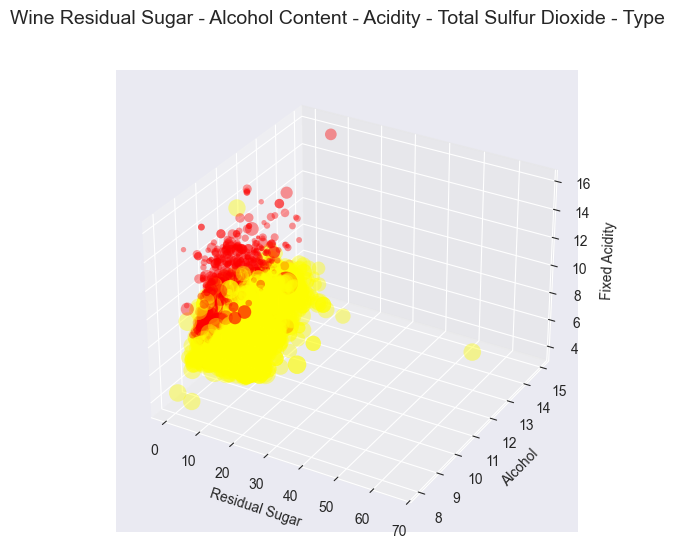

In [170]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
t = fig.suptitle('Wine Residual Sugar - Alcohol Content - Acidity - Total Sulfur Dioxide - Type', fontsize=14)

xs = list(wines['residual sugar'])
ys = list(wines['alcohol'])
zs = list(wines['fixed acidity'])
data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]

ss = list(wines['total sulfur dioxide'])
colors = ['red' if wt == 'red' else 'yellow' for wt in list(wines['wine_type'])]

for data, color, size in zip(data_points, colors, ss):
    x, y, z = data
    ax.scatter(x, y, z, alpha=0.4, c=color, edgecolors='none', s=size)

ax.set_xlabel('Residual Sugar')
ax.set_ylabel('Alcohol')
ax.set_zlabel('Fixed Acidity')

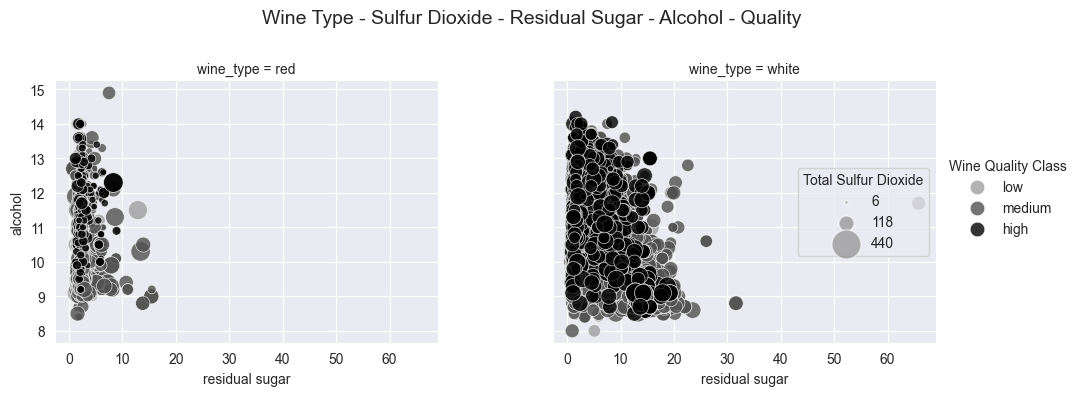

In [218]:

wines["size_scaled"] = wines["total sulfur dioxide"] * 2


g = sns.FacetGrid(wines, col="wine_type", hue='quality_label',
                  col_order=['red', 'white'], height=4, hue_order=['low', 'medium', 'high'],
                  aspect=1.2, palette=sns.light_palette('black', 4)[1:])


g.map_dataframe(sns.scatterplot, x="residual sugar", y="alcohol",
                alpha=0.8, edgecolor='white', linewidth=0.5,
                size="size_scaled", sizes=(20, 200), legend=False)


fig = g.fig
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('Wine Type - Sulfur Dioxide - Residual Sugar - Alcohol - Quality', fontsize=14)


g.add_legend(title='Wine Quality Class')




size_legend_values = [wines["total sulfur dioxide"].min(),
                      wines["total sulfur dioxide"].median(),
                      wines["total sulfur dioxide"].max()]


size_legend_patches = [plt.scatter([], [], s=size, color='gray', alpha=0.6, edgecolor='white')
                       for size in size_legend_values]

plt.legend(size_legend_patches, [f'{int(val)}' for val in size_legend_values],
           title="Total Sulfur Dioxide", loc='center right', frameon=True)

plt.show()


## Visualizing six dimensions

Now, let’s add another data dimension in our visualizations. We will leverage depth, hue, size and shape besides our regular two axes to depict all the six data dimensions.

/var/folders/_n/zfchkhnd1kd1krd5j2g884c40000gn/T/ipykernel_12168/3962126096.py:16: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, z, alpha=0.4, c=color, edgecolors='none', s=size, marker=mark)


Text(0.5, 0, 'Fixed Acidity')

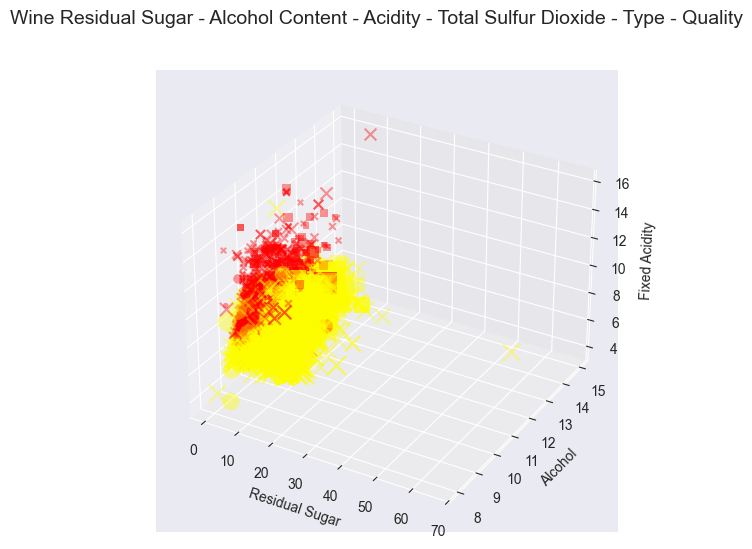

In [167]:
fig = plt.figure(figsize=(8, 6))
t = fig.suptitle('Wine Residual Sugar - Alcohol Content - Acidity - Total Sulfur Dioxide - Type - Quality', fontsize=14)
ax = fig.add_subplot(111, projection='3d')

xs = list(wines['residual sugar'])
ys = list(wines['alcohol'])
zs = list(wines['fixed acidity'])
data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]

ss = list(wines['total sulfur dioxide'])
colors = ['red' if wt == 'red' else 'yellow' for wt in list(wines['wine_type'])]
markers = [',' if q == 'high' else 'x' if q == 'medium' else 'o' for q in list(wines['quality_label'])]

for data, color, size, mark in zip(data_points, colors, ss, markers):
    x, y, z = data
    ax.scatter(x, y, z, alpha=0.4, c=color, edgecolors='none', s=size, marker=mark)

ax.set_xlabel('Residual Sugar')
ax.set_ylabel('Alcohol')
ax.set_zlabel('Fixed Acidity')

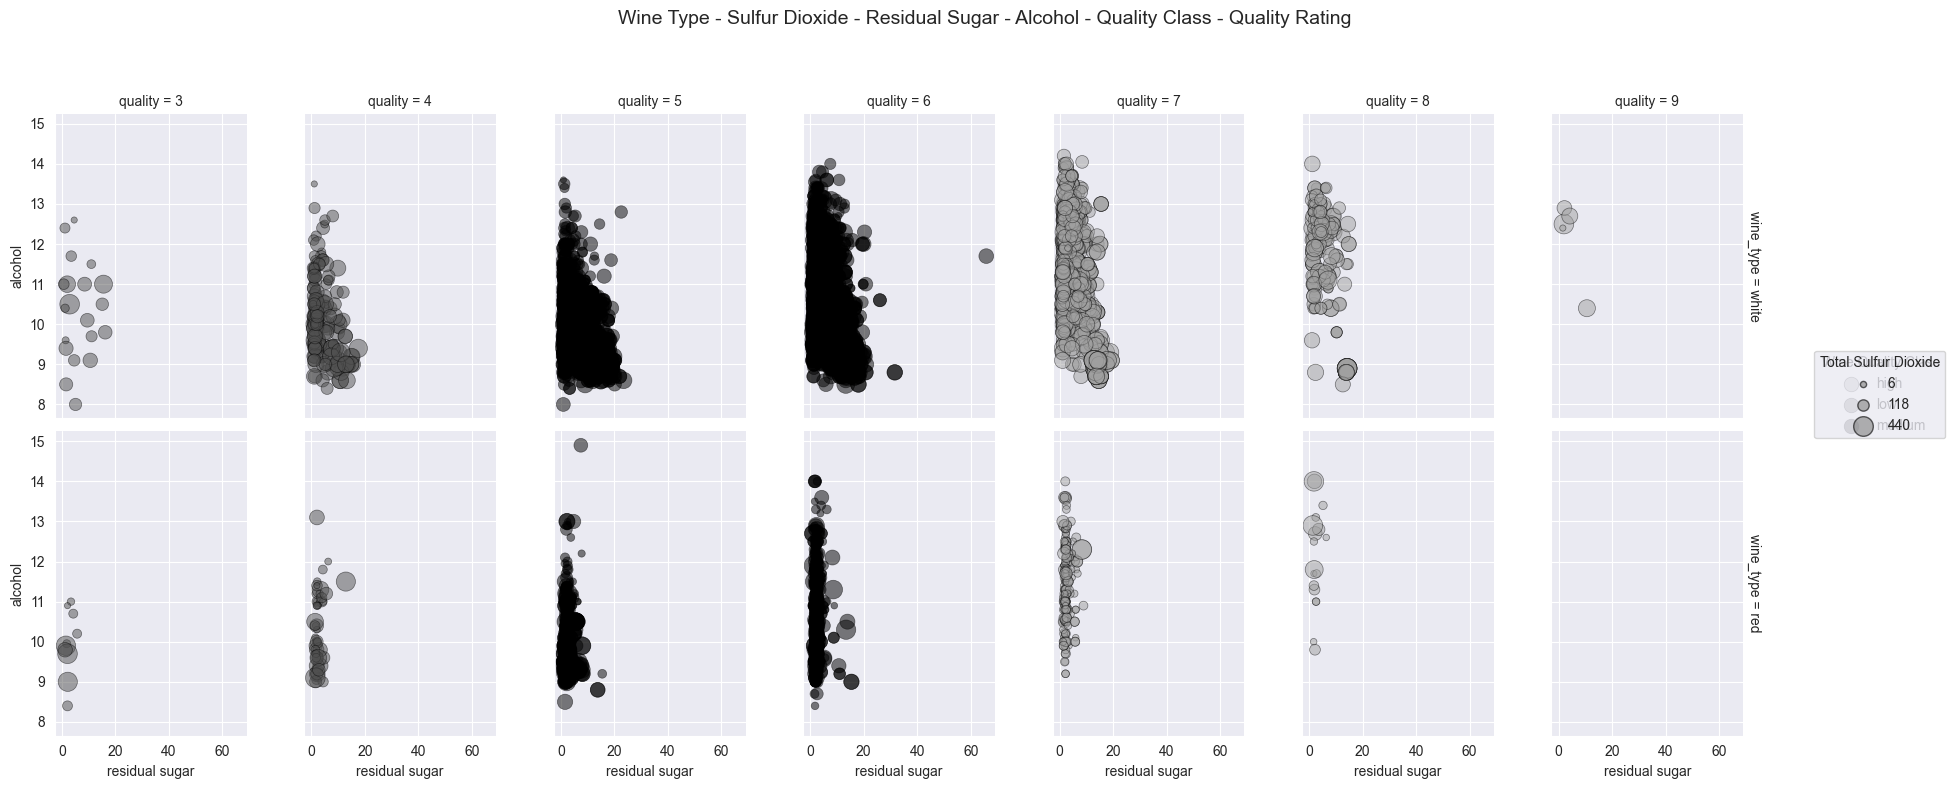

In [225]:


wines["size_scaled"] = wines["total sulfur dioxide"] * 2


g = sns.FacetGrid(wines, row='wine_type', col="quality", hue='quality_label',
                  margin_titles=True, height=4, aspect=1.2, palette=sns.light_palette('black', 4)[1:])


g.map_dataframe(sns.scatterplot, x="residual sugar", y="alcohol",
                alpha=0.5, edgecolor='k', linewidth=0.5,
                size="size_scaled", sizes=(20, 200), legend=False)  # Disabling automatic legend


fig = g.fig
fig.set_size_inches(18, 8)
fig.subplots_adjust(top=0.85, wspace=0.3)
fig.suptitle('Wine Type - Sulfur Dioxide - Residual Sugar - Alcohol - Quality Class - Quality Rating', fontsize=14)


g.add_legend(title='Wine Quality Class')




size_legend_values = [wines["total sulfur dioxide"].min(),
                      wines["total sulfur dioxide"].median(),
                      wines["total sulfur dioxide"].max()]
size_legend_scaled = np.interp(size_legend_values,
                               (wines["total sulfur dioxide"].min(), wines["total sulfur dioxide"].max()),
                               (20, 200))


size_legend_patches = [plt.scatter([], [], s=size, color='gray', alpha=0.6, edgecolor='k')
                       for size in size_legend_scaled]


fig.legend(size_legend_patches, [f'{int(val)}' for val in size_legend_values],
           title="Total Sulfur Dioxide", loc='center right', frameon=True)

plt.show()


I believe that 5&6 dimensions plot become tough to interpret and finds relationship. Again faceting concept help us to perform analysis. I believe that when we present result of our work, we should adjust complexity of the plot to public and rather avoid such dimension.